# Post-COVID Demand Forecasting and Production Optimization in the Indian Automobile Sector: A Case Study of Indian Automobile Companies Using Machine Learning and Game Theory

## Understanding the Problem Statement

#### After COVID-19, India’s automobile market saw an unusual demand spike because people preferred personal vehicles over public transport. Indian utomakers had to scaleup production aggressively. But once the demand stabilized, unsold inventories piled up, forcing companies to sell cars at huge discounts (₹10k–50k per vehicle).

#### This highlights a forecasting and production mismatch problem—companies lacked accurate demand prediction and optimal production planning tools, leading to losses.

---

## Approach


#### Data Collection & Cleaning – Collect sales, production, and macroeconomic data (2020–2025). Preprocess by removing missing values, normalization, and feature engineering.

#### Exploratory Data Analysis (EDA) – Visualize demand fluctuations, seasonal patterns, and post-COVID consumer behavior.

#### Machine Learning Forecasting – Use Linear Regression, Random Forest, and XGBoost to predict future demand.

#### Game Theory – Model competition between Mahindra and Honda to understand pricing and production strategies in a duopoly setting.

#### Model Evaluation – Assess models using RMSE, MAE, and R² to ensure reliability.

#### Strategic Insights – Recommend optimal production and sales strategies to minimize discounts and maximize profits.

---

## Objective

#### To accurately forecast demand in the post-COVID Indian automobile market.

#### To optimize production planning for automobile companies, reducing excess stock.

#### To apply ML + Game Theory for balancing demand, production, and competition.

#### To provide data-driven recommendations for sustainable profitability.

---

## Conclusion

#### This project demonstrates how machine learning forecasting + optimization + game theory can solve real-world challenges in the automobile industry. By forecasting demand more accurately, segmenting customer patterns, optimizing production, and analyzing competition, automobile companies can significantly reduce overproduction, cut unnecessary discounts, and sustain long-term profitability in a post-COVID market.

---

### Importing Libraries and Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [3]:
mahindra_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\mahindra_dataset.csv")
honda_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\honda_dataset.csv")
hyundai_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\hyundai_dataset.csv")
kia_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\kia_dataset.csv")
maruti_n_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\maruti_n_dataset.csv")
skoda_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\skoda_dataset.csv")
tata_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\tata_dataset.csv")
vw_data = pd.read_csv(r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\vw_dataset.csv")

### Understanding the data

In [4]:
## For Mahindra
print(mahindra_data.head())

           VIN    SaleDate Region        State       Plant     Brand  \
0  MAH1410DS01  05-01-2019  North    Rajasthan      Chakan  Mahindra   
1  MAH1410DS02  09-01-2019  South    Telangana      Chakan  Mahindra   
2  MAH1410DS03  09-01-2019   East  West Bengal      Chakan  Mahindra   
3  MAH1410DS04  13-01-2019   West      Gujarat  Zaheerabad  Mahindra   
4  MAH1410DS05  16-01-2019   East        Bihar      Chakan  Mahindra   

        Model FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  \
0  XUV 400 EV       EV                0        196.9              171   
1        BE 6       EV                0        169.6              117   
2     XUV 3XO   Diesel                4         49.7               94   
3        BE 6       EV                0        152.2               90   
4        BE 6       EV                0        156.2               63   

   SalesUnits  Price  Discount    Revenue      Profit  Year  
0         171  16.22         0  248166000  74435071.0  2019  
1   

In [5]:
mahindra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1774 non-null   object 
 1   SaleDate         1774 non-null   object 
 2   Region           1774 non-null   object 
 3   State            1774 non-null   object 
 4   Plant            1774 non-null   object 
 5   Brand            1774 non-null   object 
 6   Model            1774 non-null   object 
 7   FuelType         1774 non-null   object 
 8   No_of_Cylinders  1774 non-null   int64  
 9   Mileage_mpg      1774 non-null   float64
 10  ProductionUnits  1774 non-null   int64  
 11  SalesUnits       1774 non-null   int64  
 12  Price            1774 non-null   float64
 13  Discount         1774 non-null   int64  
 14  Revenue          1774 non-null   int64  
 15  Profit           1774 non-null   float64
 16  Year             1774 non-null   int64  
dtypes: float64(3),

In [6]:
print(mahindra_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count      1774.000000  1774.000000      1774.000000  1774.000000   
mean          2.561443    79.650789       124.222097   150.924464   
std           1.736896    63.763273        43.856509   137.030007   
min           0.000000    25.100000        50.000000    25.000000   
25%           0.000000    35.400000        86.000000    63.000000   
50%           3.000000    42.000000       126.000000    94.000000   
75%           4.000000   159.500000       163.000000   179.000000   
max           4.000000   199.700000       200.000000   597.000000   

             Price       Discount       Revenue        Profit         Year  
count  1774.000000    1774.000000  1.774000e+03  1.774000e+03  1774.000000  
mean     14.910761   34267.192785  1.306673e+08  3.943133e+07  2022.473506  
std       4.269264   28381.787478  7.858885e+07  2.403015e+07     2.062784  
min       9.010000       0.000000  1.938300e+07  6.228076e+06  2019.00

In [7]:
print(mahindra_data.nunique())

VIN                1774
SaleDate           1048
Region                5
State                20
Plant                 5
Brand                 1
Model                 7
FuelType              3
No_of_Cylinders       3
Mileage_mpg         456
ProductionUnits     151
SalesUnits          301
Price               643
Discount              9
Revenue            1374
Profit             1387
Year                  7
dtype: int64


In [8]:
## For Honda
print(honda_data.head())

           VIN    SaleDate Region        State          Plant  Brand  \
0  HND1410SD01  05-01-2019   West  Maharashtra       Tapukara  Honda   
1  HND1410SD02  09-01-2019  South    Karnataka  Greater Noida  Honda   
2  HND1410SD03  09-01-2019   West      Gujarat  Greater Noida  Honda   
3  HND1410SD04  13-01-2019   East       Odisha       Tapukara  Honda   
4  HND1410SD05  16-01-2019   West      Gujarat  Greater Noida  Honda   

         Model FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  \
0         City   Hybrid                4         56.8              186   
1    City eHEV   Petrol                4         39.9              218   
2    City eHEV   Petrol                4         45.9              192   
3  Amaze 2 Gen   Diesel                4         53.3              196   
4    City eHEV   Petrol                4         46.0              198   

   SalesUnits  Price  Discount    Revenue      Profit  Year  
0         174  13.25      2500  102960000  24446868.0  2019 

In [9]:
honda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1774 non-null   object 
 1   SaleDate         1774 non-null   object 
 2   Region           1774 non-null   object 
 3   State            1774 non-null   object 
 4   Plant            1774 non-null   object 
 5   Brand            1774 non-null   object 
 6   Model            1774 non-null   object 
 7   FuelType         1774 non-null   object 
 8   No_of_Cylinders  1774 non-null   int64  
 9   Mileage_mpg      1774 non-null   float64
 10  ProductionUnits  1774 non-null   int64  
 11  SalesUnits       1774 non-null   int64  
 12  Price            1774 non-null   float64
 13  Discount         1774 non-null   int64  
 14  Revenue          1774 non-null   int64  
 15  Profit           1774 non-null   float64
 16  Year             1774 non-null   int64  
dtypes: float64(3),

In [10]:
print(honda_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count           1774.0  1774.000000      1774.000000  1774.000000   
mean               4.0    47.860992       329.313980   395.241826   
std                0.0     6.386622       100.033587   351.068842   
min                4.0    38.000000        94.000000    47.000000   
25%                4.0    42.800000       244.000000   170.000000   
50%                4.0    47.300000       336.000000   234.000000   
75%                4.0    51.600000       420.000000   456.000000   
max                4.0    64.900000       632.000000  1500.000000   

             Price      Discount       Revenue        Profit         Year  
count  1774.000000   1774.000000  1.774000e+03  1.774000e+03  1774.000000  
mean     10.829673  14457.440812  1.277726e+08  3.198626e+07  2022.473506  
std       2.337186  11064.889283  6.653016e+07  1.733553e+07     2.062784  
min       7.050000      0.000000  2.977500e+07  6.574780e+06  2019.000000 

In [11]:
print(honda_data.nunique())

VIN                1774
SaleDate           1048
Region                4
State                17
Plant                 2
Brand                 1
Model                 5
FuelType              3
No_of_Cylinders       1
Mileage_mpg         242
ProductionUnits     180
SalesUnits          365
Price               570
Discount             13
Revenue             994
Profit             1001
Year                  7
dtype: int64


In [12]:
## For Hyundai
print(hyundai_data.head())

             VIN    SaleDate  Region       State    Plant    Brand    Model  \
0  HYU1410SD0007  23-04-2019    West         Goa  Chennai  Hyundai      i20   
1  HYU1410SD0009  07-07-2019  Export       Dubai  Chennai  Hyundai    Creta   
2  HYU1410SD0010  31-08-2019   South   Karnataka  Chennai  Hyundai  Alcazar   
3  HYU1410SD0011  29-12-2019  Export  Bangladesh  Chennai  Hyundai    Creta   
4  HYU1410SD0016  25-06-2019  Export   Sri Lanka  Chennai  Hyundai    Creta   

  FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits  Price  \
0   Diesel                4         40.3           162.20       704.8   9.21   
1   Petrol                4         38.6            28.24       125.2  11.80   
2   Diesel                4         27.4           178.56       746.4  21.60   
3   Petrol                4         39.3           114.96       528.6  11.34   
4   Diesel                4         34.5           123.84       162.2  14.56   

   Discount    Revenue       Profit  Year  


In [13]:
hyundai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1775 non-null   object 
 1   SaleDate         1775 non-null   object 
 2   Region           1775 non-null   object 
 3   State            1775 non-null   object 
 4   Plant            1775 non-null   object 
 5   Brand            1775 non-null   object 
 6   Model            1775 non-null   object 
 7   FuelType         1775 non-null   object 
 8   No_of_Cylinders  1775 non-null   int64  
 9   Mileage_mpg      1775 non-null   float64
 10  ProductionUnits  1775 non-null   float64
 11  SalesUnits       1775 non-null   float64
 12  Price            1775 non-null   float64
 13  Discount         1775 non-null   int64  
 14  Revenue          1775 non-null   int64  
 15  Profit           1775 non-null   float64
 16  Year             1775 non-null   int64  
dtypes: float64(5),

In [14]:
print(hyundai_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count       1775.00000  1775.000000      1775.000000  1775.000000   
mean           3.76169    40.449352       137.241405   155.619944   
std            0.42617     7.648183       158.023760   148.230965   
min            3.00000    25.000000        20.000000    50.000000   
25%            4.00000    35.200000        39.600000    80.000000   
50%            4.00000    40.000000       110.000000   110.000000   
75%            4.00000    47.100000       167.500000   150.000000   
max            4.00000    54.900000       991.800000   945.800000   

             Price      Discount       Revenue        Profit         Year  
count  1775.000000   1775.000000  1.775000e+03  1.775000e+03  1775.000000  
mean     11.465515  24786.777465  1.147903e+08  2.643512e+07  2022.001690  
std       4.117418  14534.054418  5.837432e+07  1.403289e+07     1.994778  
min       6.010000     18.000000  3.045669e+07  6.427425e+06  2019.000000 

In [15]:
print(hyundai_data.nunique())

VIN                1775
SaleDate           1293
Region                5
State                24
Plant                 1
Brand                 1
Model                 7
FuelType              2
No_of_Cylinders       2
Mileage_mpg         289
ProductionUnits     589
SalesUnits          342
Price               950
Discount           1748
Revenue            1775
Profit             1775
Year                  7
dtype: int64


In [16]:
## For Kia
print(kia_data.head())

           VIN    SaleDate Region       State    Plant Brand Model FuelType  \
0  KIA1410DS07  10-09-2019   East      Odisha     Pune   Kia   EV6       EV   
1  KIA1410DS30  28-02-2019  South  Tamil Nadu  Chennai   Kia   EV9       EV   
2  KIA1410DS35  10-08-2019  South  Tamil Nadu     Pune   Kia   EV9       EV   
3  KIA1410DS46  05-07-2019   East      Odisha  Chennai   Kia   EV6       EV   
4  KIA1410DS47  04-07-2019  South   Telangana  Chennai   Kia   EV5       EV   

   No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits       Price  \
0                0        151.1            183.0       447.0  2143721.24   
1                0        188.9            150.0       180.0  2285521.94   
2                0        176.3            103.0       231.0  2724772.87   
3                0        167.6            216.0       582.0  2103336.65   
4                0        162.7            233.0       372.0  1851198.56   

   Discount      Revenue        Profit  Year  
0     46593  31247210

In [17]:
kia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1775 non-null   object 
 1   SaleDate         1775 non-null   object 
 2   Region           1775 non-null   object 
 3   State            1775 non-null   object 
 4   Plant            1775 non-null   object 
 5   Brand            1775 non-null   object 
 6   Model            1775 non-null   object 
 7   FuelType         1775 non-null   object 
 8   No_of_Cylinders  1775 non-null   int64  
 9   Mileage_mpg      1775 non-null   float64
 10  ProductionUnits  1775 non-null   float64
 11  SalesUnits       1775 non-null   float64
 12  Price            1775 non-null   float64
 13  Discount         1775 non-null   int64  
 14  Revenue          1775 non-null   float64
 15  Profit           1775 non-null   float64
 16  Year             1775 non-null   int64  
dtypes: float64(6),

In [18]:
print(kia_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count      1775.000000  1775.000000      1775.000000  1775.000000   
mean          1.863099   109.699662       246.431211   285.887662   
std           1.892806    69.183249       105.546202   141.680396   
min           0.000000    28.000000       100.000000    67.500000   
25%           0.000000    41.800000       165.000000   174.000000   
50%           0.000000   150.300000       222.200000   261.000000   
75%           4.000000   174.200000       309.000000   375.000000   
max           4.000000   209.800000       500.000000   723.000000   

              Price      Discount       Revenue        Profit         Year  
count  1.775000e+03   1775.000000  1.775000e+03  1.775000e+03  1775.000000  
mean   1.938884e+06  27704.971831  2.156799e+08  6.467990e+07  2022.032676  
std    7.204414e+05  13097.854297  1.201808e+08  3.868517e+07     2.024665  
min    9.001817e+05   5004.000000  4.593224e+07  9.847568e+06  2019.00

In [19]:
print(kia_data.nunique())

VIN                1775
SaleDate           1279
Region                4
State                16
Plant                 4
Brand                 1
Model                 8
FuelType              3
No_of_Cylinders       3
Mileage_mpg         655
ProductionUnits     410
SalesUnits          327
Price              1775
Discount           1747
Revenue            1775
Profit             1775
Year                  7
dtype: int64


In [20]:
## For Maruti Nexa
print(maruti_n_data.head())

           VIN    SaleDate Region          State    Plant        Brand  \
0  MAR2110SD01  05-01-2019  North          Delhi  Gurgaon  Maruti Nexa   
1  MAR2110SD02  09-01-2019  South     Tamil Nadu  Manesar  Maruti Nexa   
2  MAR2110SD03  09-01-2019   West    Maharashtra  Gurgaon  Maruti Nexa   
3  MAR2110SD04  13-01-2019   East    West Bengal  Manesar  Maruti Nexa   
4  MAR2110SD05  13-01-2019  North  Uttar Pradesh  Gurgaon  Maruti Nexa   

     Model FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  \
0   Baleno   Petrol                4        23.87            586.2   
1     Ciaz   Petrol                4        20.65            364.4   
2    Ignis   Petrol                4        20.89            290.2   
3  S-Cross   Diesel                4        24.00            657.0   
4      XL6   Petrol                4        19.01            440.6   

   SalesUnits  Price  Discount   Revenue   Profit  Year  
0       594.4    7.0      1500  10150000  2000000  2019  
1       726.4   10

In [21]:
maruti_n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1535 non-null   object 
 1   SaleDate         1535 non-null   object 
 2   Region           1535 non-null   object 
 3   State            1535 non-null   object 
 4   Plant            1535 non-null   object 
 5   Brand            1535 non-null   object 
 6   Model            1535 non-null   object 
 7   FuelType         1535 non-null   object 
 8   No_of_Cylinders  1535 non-null   int64  
 9   Mileage_mpg      1535 non-null   float64
 10  ProductionUnits  1535 non-null   float64
 11  SalesUnits       1535 non-null   float64
 12  Price            1535 non-null   float64
 13  Discount         1535 non-null   int64  
 14  Revenue          1535 non-null   int64  
 15  Profit           1535 non-null   int64  
 16  Year             1535 non-null   int64  
dtypes: float64(4),

In [22]:
print(maruti_n_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count      1535.000000  1535.000000      1535.000000  1535.000000   
mean          3.829316    22.358300       287.134897   447.878176   
std           0.376355     1.818301       222.358175   278.386590   
min           3.000000    19.010000        42.666667    65.000000   
25%           4.000000    20.890000       115.900000   191.700000   
50%           4.000000    22.000000       184.000000   411.200000   
75%           4.000000    24.000000       423.700000   676.200000   
max           4.000000    25.000000       963.800000  1000.000000   

             Price      Discount       Revenue        Profit         Year  
count  1535.000000   1535.000000  1.535000e+03  1.535000e+03  1535.000000  
mean     10.562736  14730.879479  3.524386e+07  6.475381e+06  2021.585668  
std       3.144840  15362.069059  4.293794e+07  7.949057e+06     1.932783  
min       5.500000   1200.000000  6.705000e+05  1.670000e+03  2019.000000 

In [23]:
print(maruti_n_data.nunique())

VIN                1535
SaleDate           1005
Region                4
State                22
Plant                 3
Brand                 2
Model                10
FuelType              2
No_of_Cylinders       2
Mileage_mpg           8
ProductionUnits    1037
SalesUnits         1019
Price               149
Discount            188
Revenue            1166
Profit              808
Year                  7
dtype: int64


In [24]:
## For Tata
print(tata_data.head())

            VIN    SaleDate Region        State       Plant Brand     Model  \
0  TAT1410SD717  13-12-2021  North    Jharkhand        Pune  Tata    Safari   
1  TAT1410SD718  14-12-2021   West  Maharashtra  Ranjangaon  Tata     Nexon   
2  TAT1410SD719  16-12-2021  South       Kerala        Pune  Tata     Tigor   
3  TAT1410SD720  18-12-2021   East       Odisha        Pune  Tata  Tiago EV   
4  TAT1410SD721  19-12-2021  North        Delhi        Pune  Tata  Nexon EV   

  FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits  Price  \
0   Diesel              4.0         36.7            134.6       446.4   9.21   
1   Petrol              4.0         46.7            194.2      1266.4  11.80   
2   Petrol              3.0         39.9            280.2      1994.0  21.60   
3       EV              0.0        152.2            107.8       364.8  21.60   
4       EV              0.0        196.9            320.2       929.2  14.56   

   Discount       Revenue       Profit    Ye

In [25]:
tata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              758 non-null    object 
 1   SaleDate         758 non-null    object 
 2   Region           758 non-null    object 
 3   State            758 non-null    object 
 4   Plant            758 non-null    object 
 5   Brand            758 non-null    object 
 6   Model            758 non-null    object 
 7   FuelType         758 non-null    object 
 8   No_of_Cylinders  758 non-null    float64
 9   Mileage_mpg      758 non-null    float64
 10  ProductionUnits  758 non-null    float64
 11  SalesUnits       758 non-null    float64
 12  Price            758 non-null    float64
 13  Discount         758 non-null    float64
 14  Revenue          758 non-null    float64
 15  Profit           758 non-null    float64
 16  Year             758 non-null    float64
dtypes: float64(9), o

In [26]:
print(tata_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits       Price  \
count       758.000000   758.000000       758.000000   758.000000  758.000000   
mean          2.502639    85.051055       176.283509   298.874494   11.434749   
std           1.688994    58.690734       131.924477   314.550097    4.170078   
min           0.000000    36.700000        32.500000    42.666667    6.030000   
25%           0.000000    46.700000        75.000000    97.333333    8.012500   
50%           3.000000    50.950000       128.125000   166.333333   10.075000   
75%           4.000000   152.200000       250.500000   430.200000   13.960000   
max           4.000000   196.900000       903.400000  1994.000000   21.990000   

           Discount       Revenue        Profit         Year  
count    758.000000  7.580000e+02  7.580000e+02   758.000000  
mean   28031.029024  5.567255e+08  1.602792e+08  2021.311346  
std    12788.703026  3.393033e+08  1.052379e+08     1.778531  
min     5080.00000

In [27]:
print(tata_data.nunique())

VIN                758
SaleDate           756
Region               4
State               16
Plant                2
Brand                1
Model               10
FuelType             3
No_of_Cylinders      3
Mileage_mpg         10
ProductionUnits    371
SalesUnits         459
Price              561
Discount           753
Revenue            757
Profit             758
Year                 7
dtype: int64


In [28]:
## For Skoda
print(skoda_data.head())

         VIN    SaleDate Region          State    Plant  Brand         Model  \
0  VIN100005  06-11-2019   West        Gujarat  Chennai  Skoda  Skoda Kushaq   
1  VIN100006  15-01-2019   West      Karnataka  Chennai  Skoda  Skoda Kyliaq   
2  VIN100010  27-11-2019   East    Maharashtra  Lucknow  Skoda  Skoda Kyliaq   
3  VIN100016  06-04-2019  North  Uttar Pradesh  Gurgaon  Skoda  Skoda Slavia   
4  VIN100017  10-09-2019   East      Karnataka  Chennai  Skoda  Skoda Kyliaq   

  FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits  \
0   Hybrid                6        14.91            155.8       239.0   
1   Petrol                6        17.42            492.3       420.2   
2   Petrol                6        21.24            364.0       599.2   
3   Diesel                3        21.97            215.5       363.8   
4   Hybrid                3        22.47            498.5       280.2   

     Price  Discount      Revenue        Profit  Year  
0  3000000   3182.32   3

In [29]:
skoda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              1775 non-null   object 
 1   SaleDate         1775 non-null   object 
 2   Region           1775 non-null   object 
 3   State            1775 non-null   object 
 4   Plant            1775 non-null   object 
 5   Brand            1775 non-null   object 
 6   Model            1775 non-null   object 
 7   FuelType         1775 non-null   object 
 8   No_of_Cylinders  1775 non-null   int64  
 9   Mileage_mpg      1775 non-null   float64
 10  ProductionUnits  1775 non-null   float64
 11  SalesUnits       1775 non-null   float64
 12  Price            1775 non-null   int64  
 13  Discount         1775 non-null   float64
 14  Revenue          1775 non-null   int64  
 15  Profit           1775 non-null   float64
 16  Year             1775 non-null   int64  
dtypes: float64(5),

In [30]:
print(skoda_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits   SalesUnits  \
count      1775.000000  1775.000000      1775.000000  1775.000000   
mean          4.350986    18.462372       277.788282   321.129577   
std           1.255054     3.728599       133.578009   209.019756   
min           3.000000    12.000000        50.000000    80.000000   
25%           3.000000    15.270000       159.700000   148.200000   
50%           4.000000    18.390000       280.600000   256.000000   
75%           6.000000    21.590000       397.050000   453.700000   
max           6.000000    25.000000       499.900000   963.800000   

              Price     Discount       Revenue        Profit         Year  
count  1.775000e+03  1775.000000  1.775000e+03  1.775000e+03  1775.000000  
mean   2.497634e+06  2393.758107  3.878774e+09  6.795991e+08  2022.077183  
std    8.968786e+05   929.818265  3.042946e+09  5.677917e+08     2.028326  
min    1.000000e+06   800.880000  3.771994e+08  4.365831e+07  2019.000000 

In [31]:
print(skoda_data.nunique())

VIN                1775
SaleDate           1237
Region                5
State                 6
Plant                 6
Brand                 1
Model                 4
FuelType              4
No_of_Cylinders       3
Mileage_mpg         981
ProductionUnits    1415
SalesUnits         1262
Price                31
Discount           1762
Revenue            1775
Profit             1775
Year                  7
dtype: int64


In [32]:
## For Volkwagen
print(vw_data.head())

           VIN    SaleDate Region        State   Plant       Brand   Model  \
0  VWG1410SD01  05-01-2019   West  Maharashtra    Pune  Volkswagen    Polo   
1  VWG1410SD02  09-01-2019  South    Karnataka    Pune  Volkswagen  Tiguan   
2  VWG1410SD03  09-01-2019   West      Gujarat    Pune  Volkswagen   Vento   
3  VWG1410SD04  13-01-2019   East       Odisha  Chakan  Volkswagen    Polo   
4  VWG1410SD05  17-01-2019  North        Delhi    Pune  Volkswagen  Taigun   

  FuelType  No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits  Price  \
0   Petrol              4.0         18.7            190.0       239.0    9.5   
1   Diesel              4.0         15.6            210.0       420.2   10.2   
2   Petrol              4.0         17.2            180.0       599.2    8.8   
3   Petrol              4.0         18.7            195.0       363.8    9.5   
4   Petrol              3.0         18.1            200.0       280.2   11.5   

   Discount      Revenue      Profit    Year  
0  

In [33]:
vw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIN              774 non-null    object 
 1   SaleDate         774 non-null    object 
 2   Region           774 non-null    object 
 3   State            774 non-null    object 
 4   Plant            774 non-null    object 
 5   Brand            774 non-null    object 
 6   Model            774 non-null    object 
 7   FuelType         774 non-null    object 
 8   No_of_Cylinders  774 non-null    float64
 9   Mileage_mpg      774 non-null    float64
 10  ProductionUnits  774 non-null    float64
 11  SalesUnits       774 non-null    float64
 12  Price            774 non-null    float64
 13  Discount         774 non-null    float64
 14  Revenue          774 non-null    float64
 15  Profit           774 non-null    float64
 16  Year             774 non-null    float64
dtypes: float64(9), o

In [34]:
print(vw_data.describe())

       No_of_Cylinders  Mileage_mpg  ProductionUnits  SalesUnits       Price  \
count       774.000000   774.000000       774.000000  774.000000  774.000000   
mean          3.801034    17.797804       204.481912  319.667959   10.392119   
std           0.399481     1.315991        56.019953  209.574425    1.197314   
min           3.000000    15.600000        90.000000   80.000000    8.800000   
25%           4.000000    17.200000       185.000000  146.500000    9.500000   
50%           4.000000    18.100000       210.000000  258.400000   10.200000   
75%           4.000000    18.700000       243.000000  451.700000   11.500000   
max           4.000000    19.400000       288.500000  963.800000   12.000000   

          Discount       Revenue        Profit         Year  
count   774.000000  7.740000e+02  7.740000e+02   774.000000  
mean   2417.429767  1.221783e+08  3.025969e+07  2021.534884  
std     934.822559  1.958731e+07  6.159250e+06     2.095569  
min     814.360000  9.500000e+0

In [35]:
print(vw_data.nunique())

VIN                774
SaleDate           639
Region               4
State               19
Plant                2
Brand                1
Model                5
FuelType             2
No_of_Cylinders      2
Mileage_mpg          5
ProductionUnits     29
SalesUnits         657
Price                5
Discount           773
Revenue             11
Profit              11
Year                 7
dtype: int64


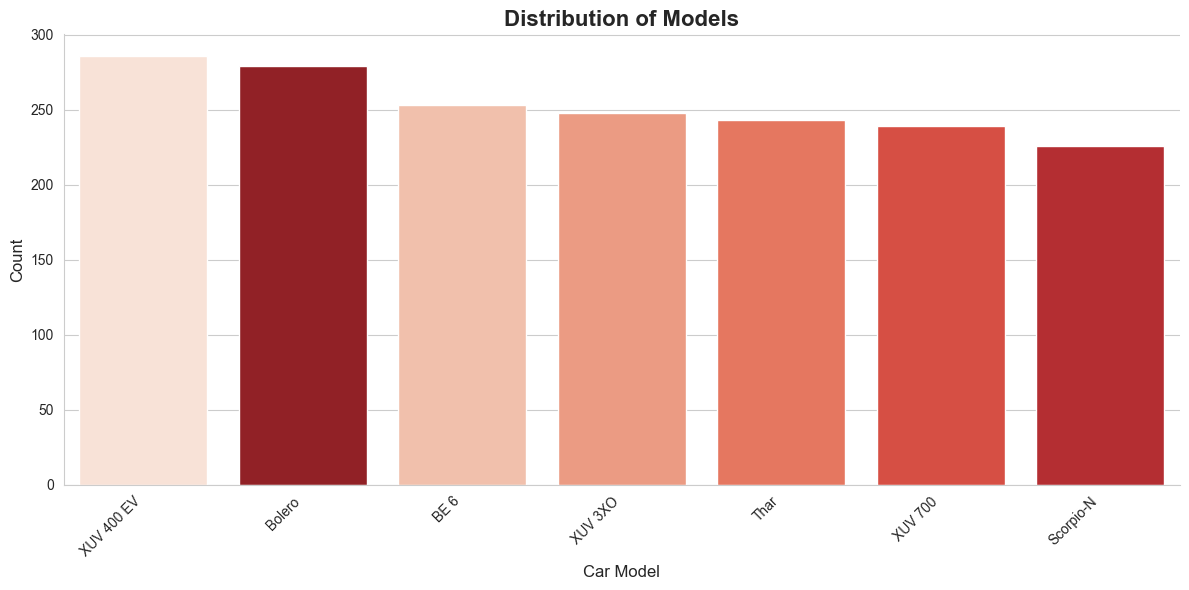

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=mahindra_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=mahindra_data["Model"].value_counts().index,
    legend=False  # <-- Hide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

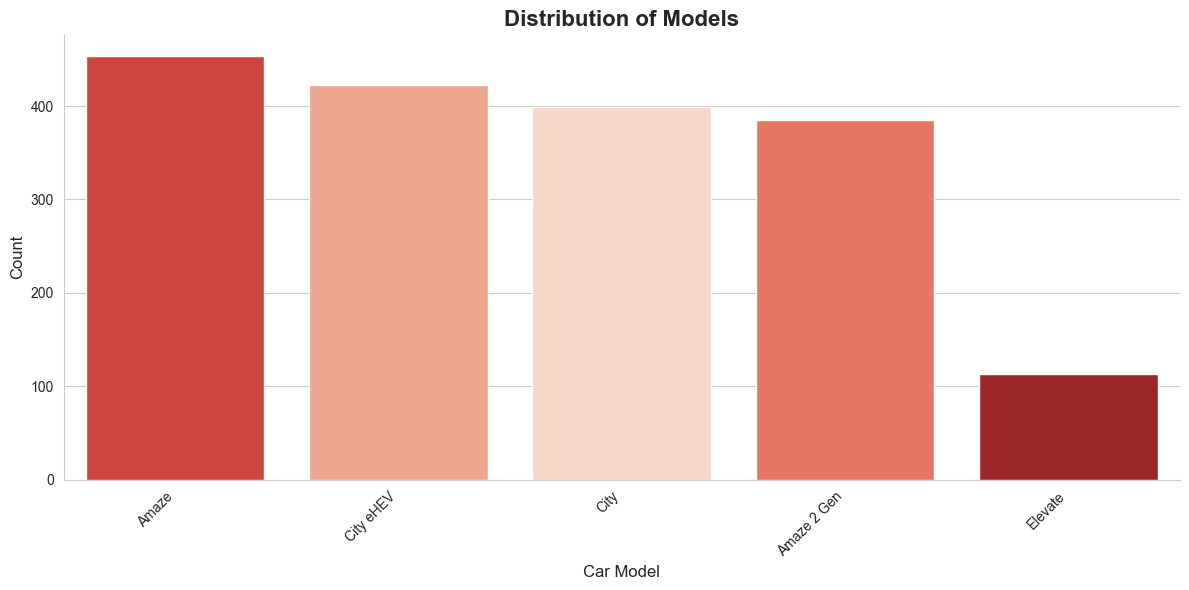

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=honda_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=honda_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

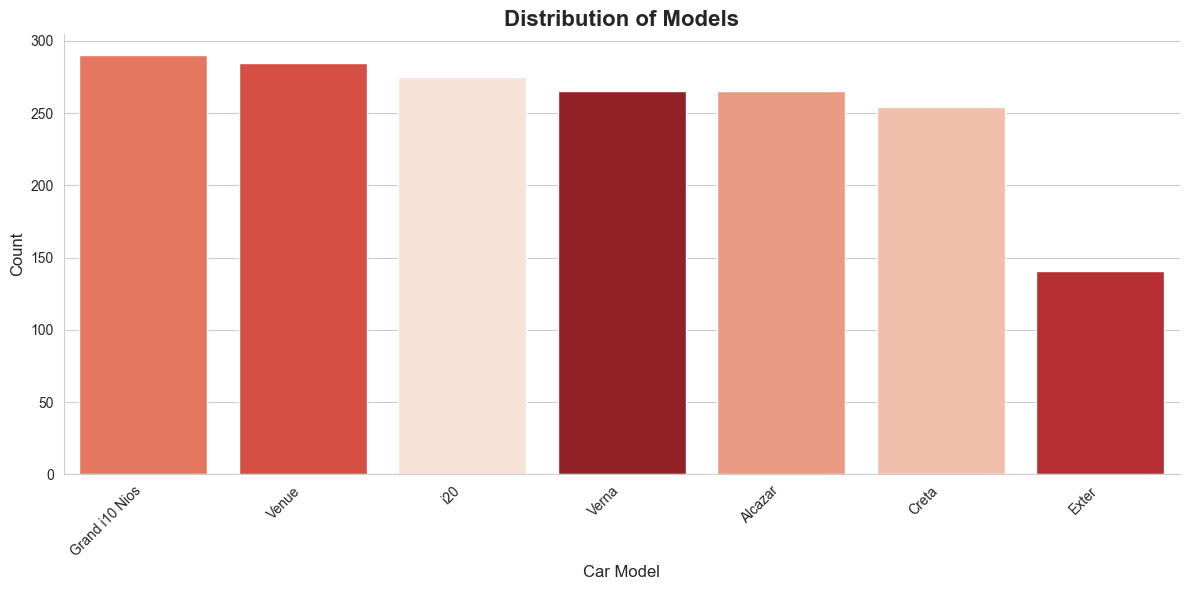

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=hyundai_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=hyundai_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

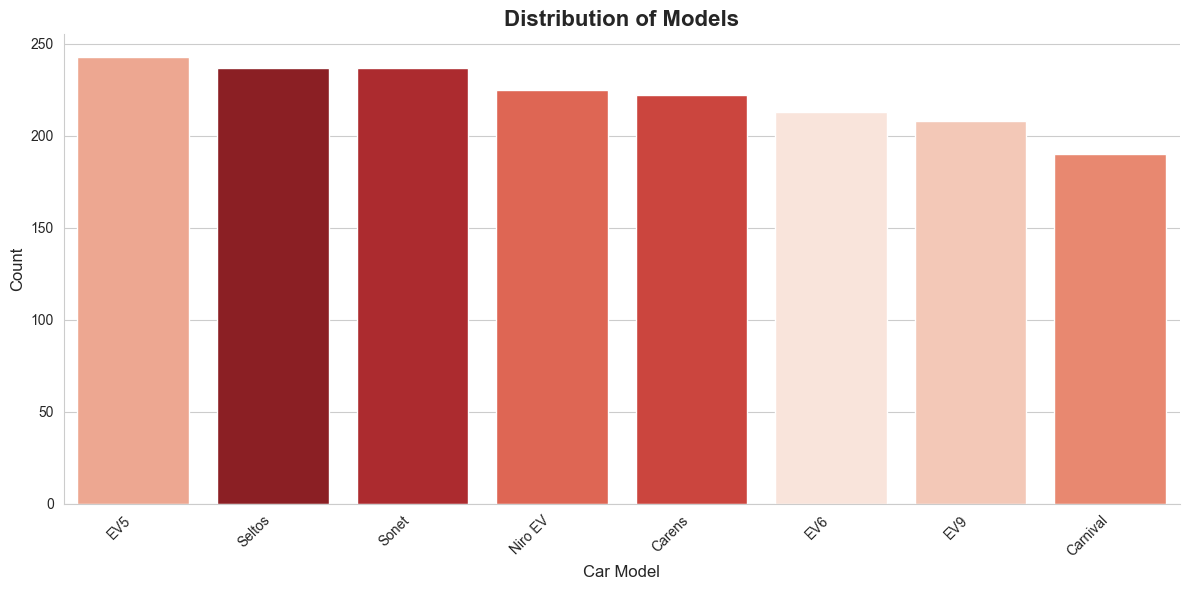

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=kia_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=kia_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

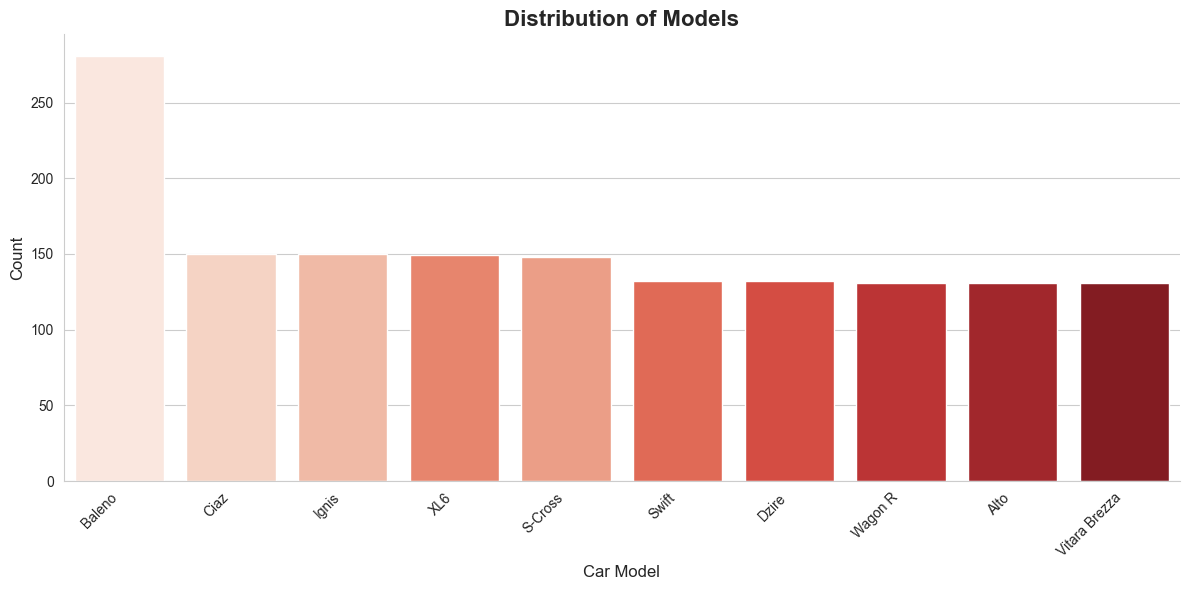

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=maruti_n_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=maruti_n_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=maruti_a_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=maruti_a_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

NameError: name 'maruti_a_data' is not defined

<Figure size 1200x600 with 0 Axes>

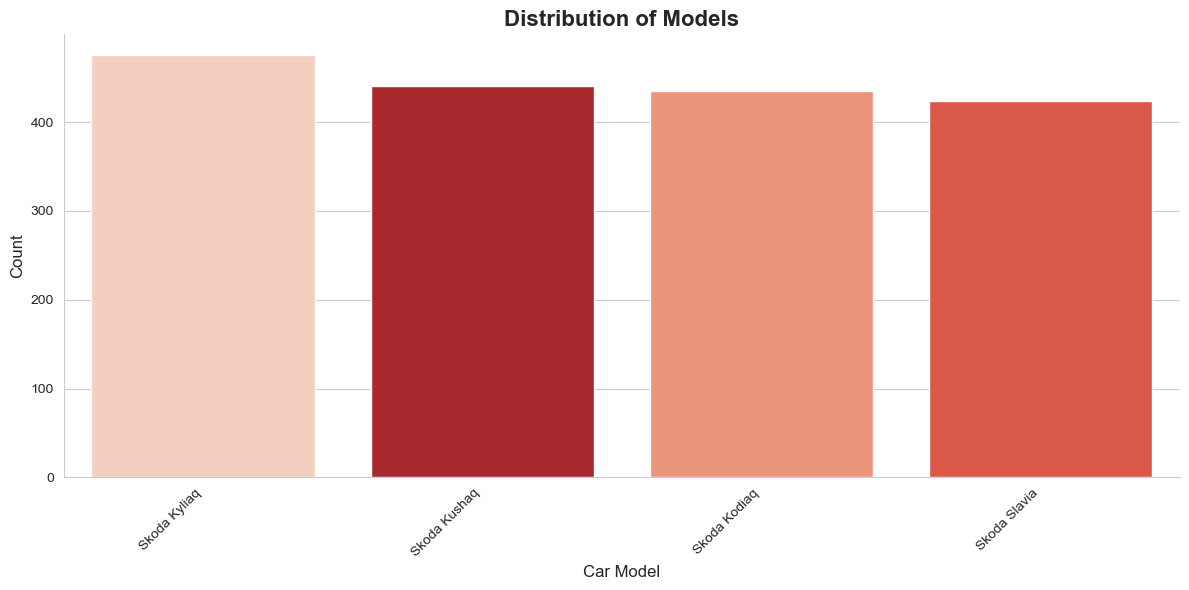

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=skoda_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=skoda_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

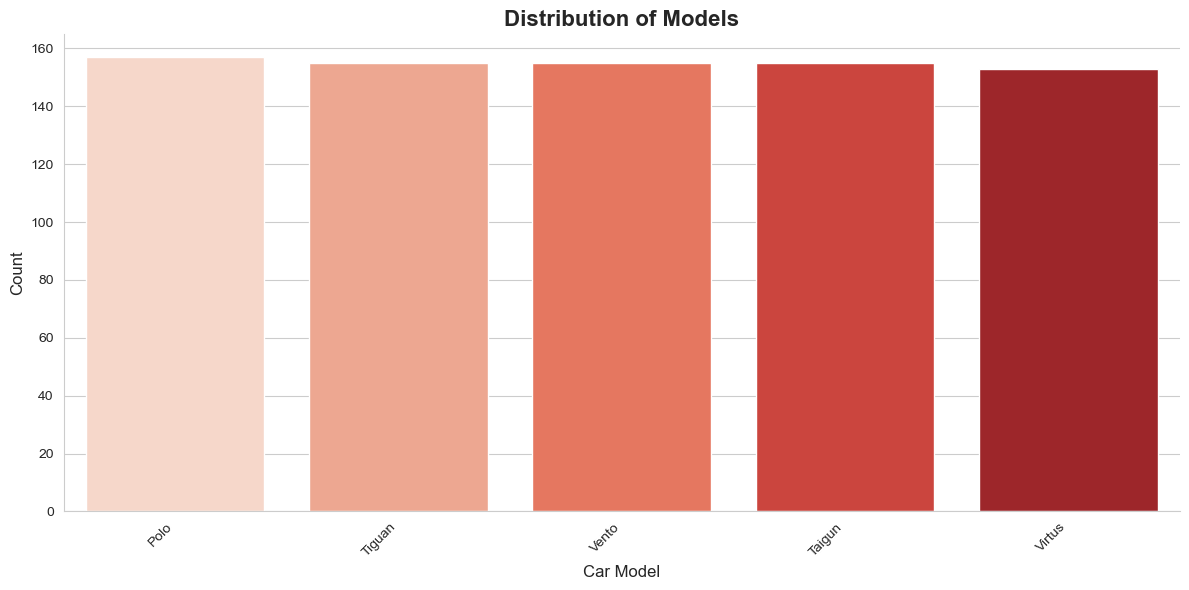

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=vw_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=vw_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

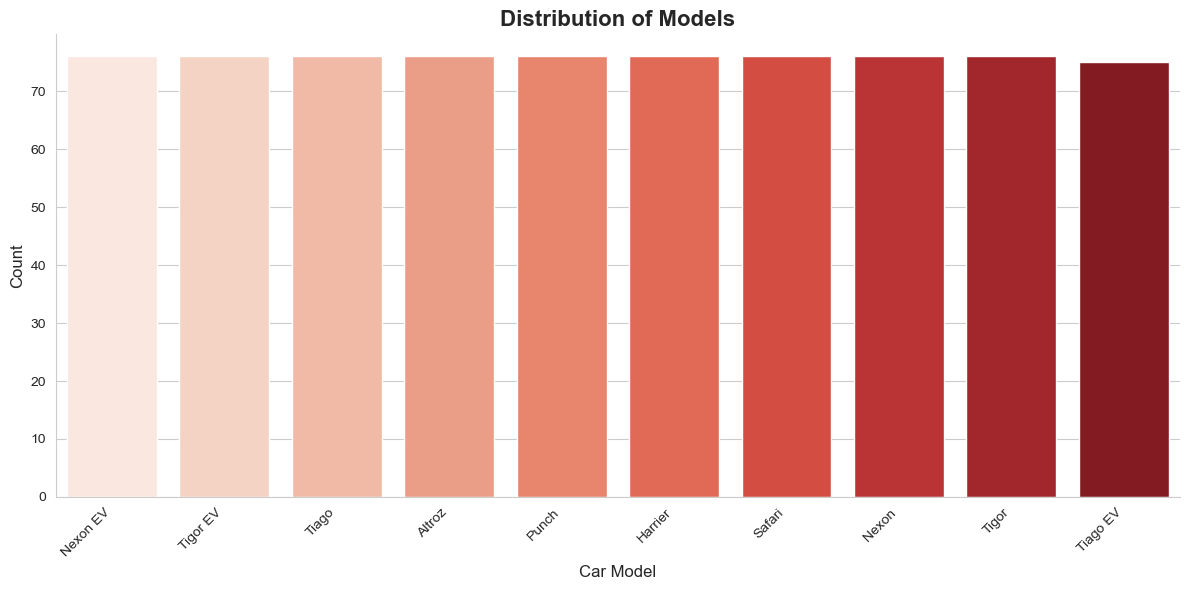

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # Bigger figure
sns.set_style("whitegrid")  # Clean background

sns.countplot(
    x="Model", 
    data=tata_data, 
    hue="Model",  # <-- Explicit hue
    palette="Reds",  
    order=tata_data["Model"].value_counts().index,
    legend=False  # <-- Hvide redundant legend
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Models", fontsize=16, fontweight="bold")
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

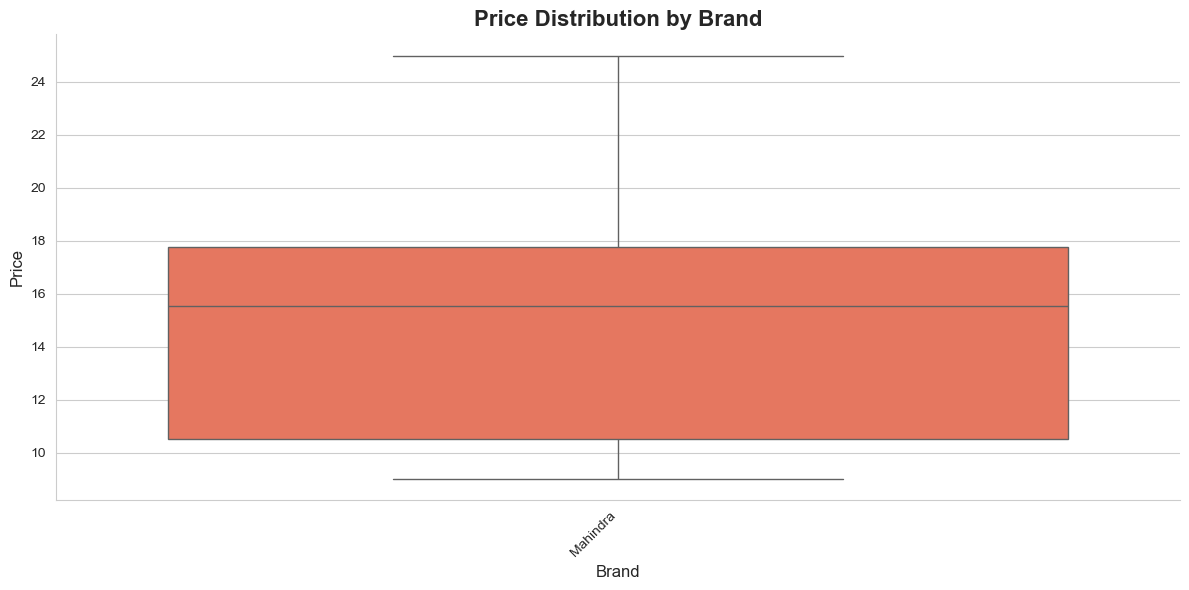

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=mahindra_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


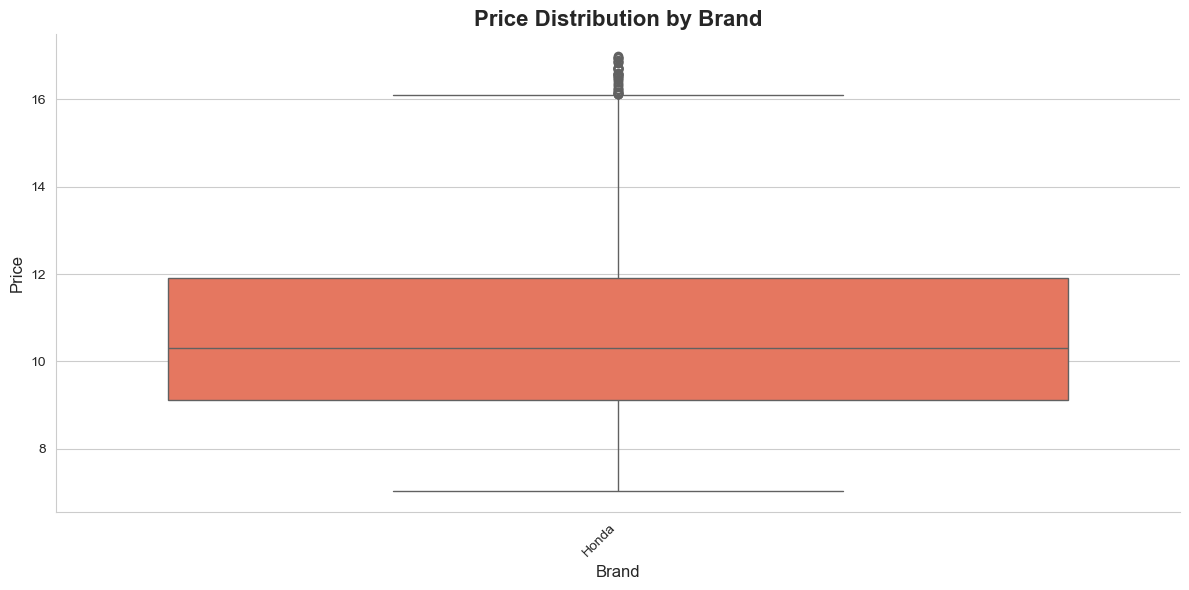

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=honda_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


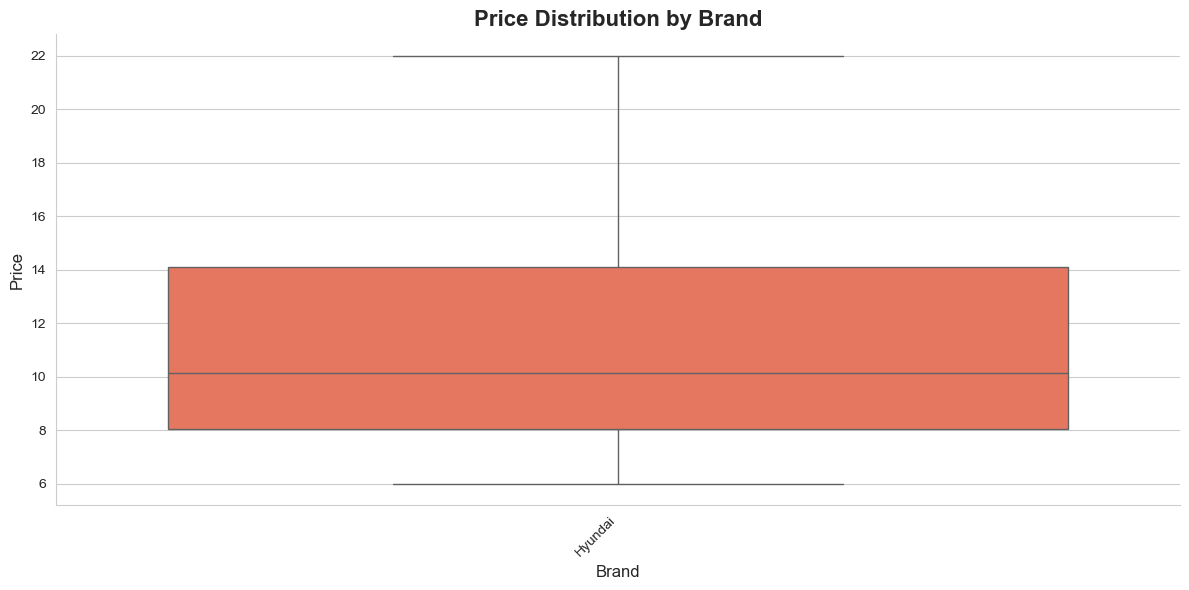

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=hyundai_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


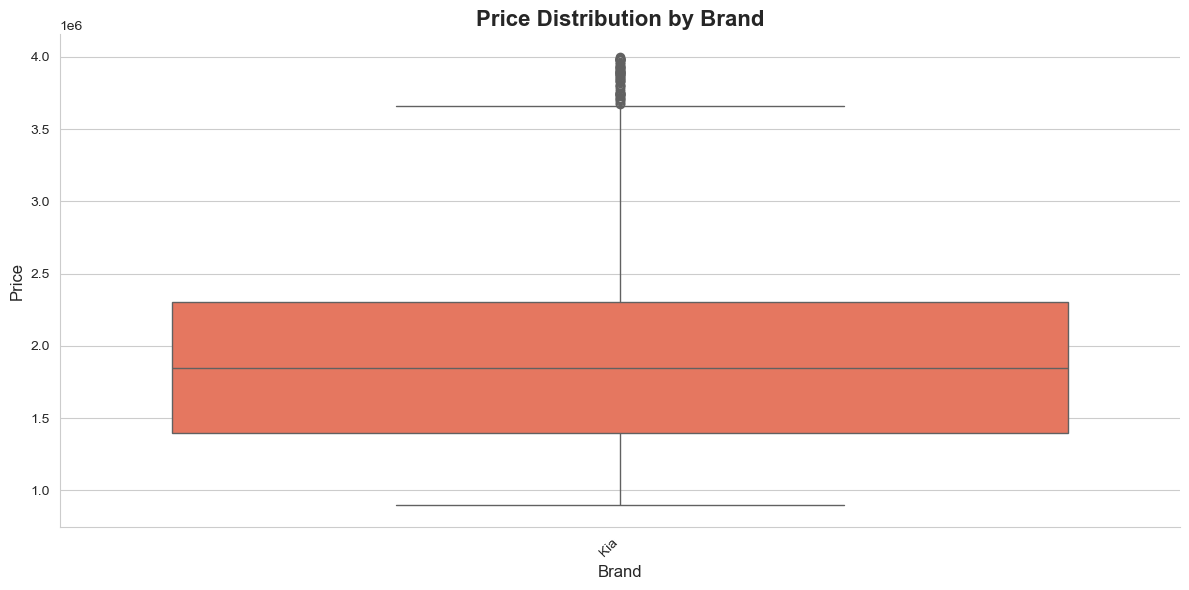

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=kia_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


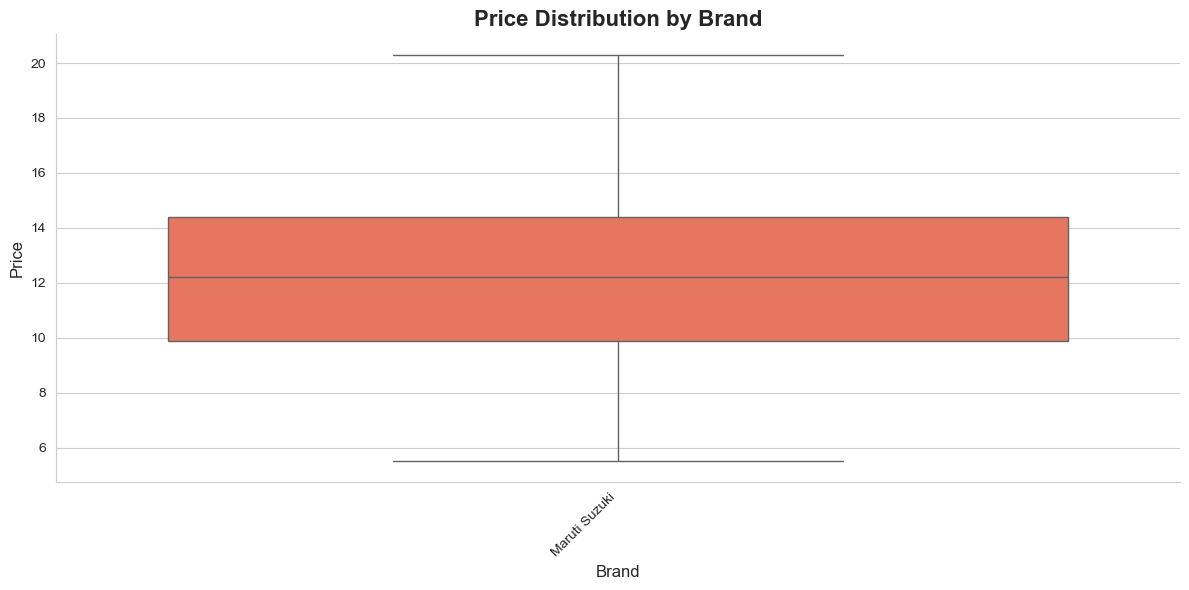

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=maruti_a_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


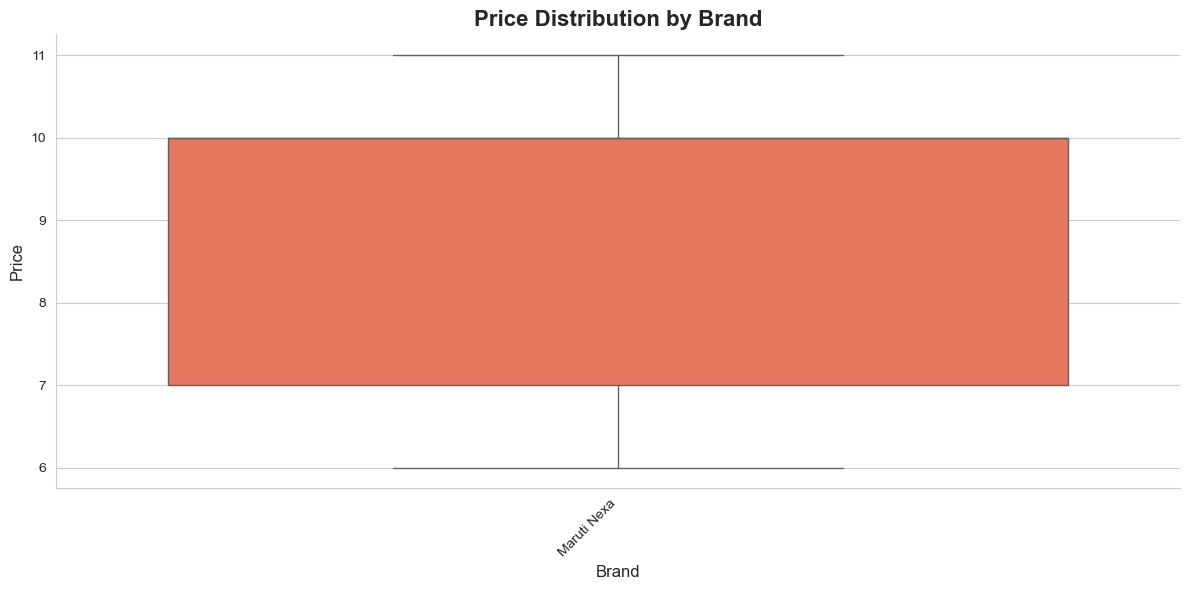

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=maruti_n_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


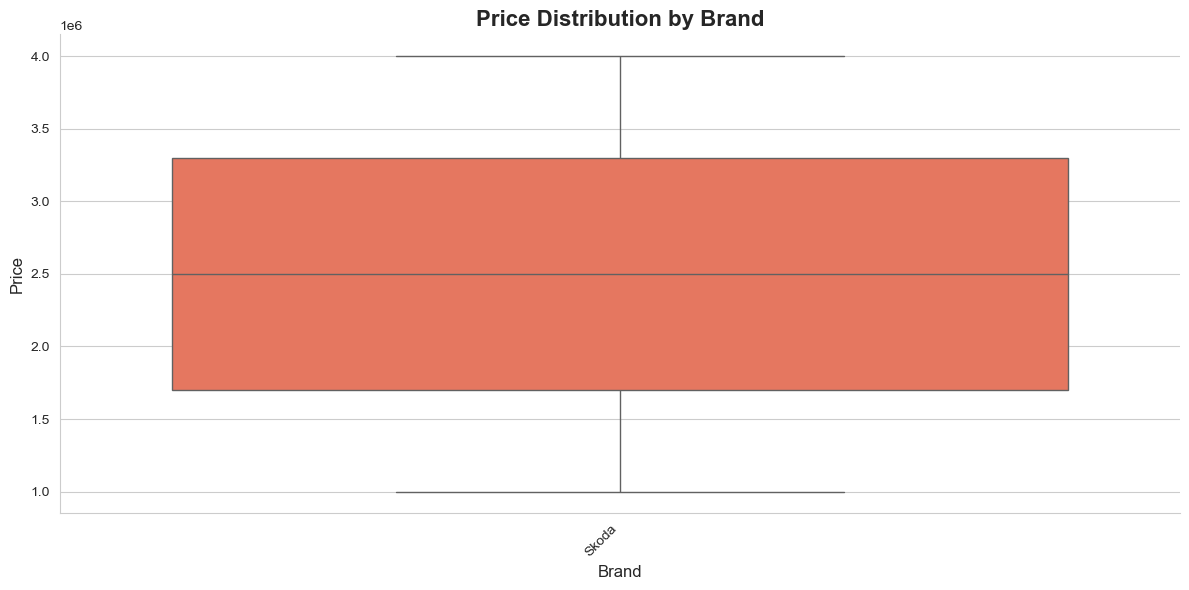

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=skoda_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


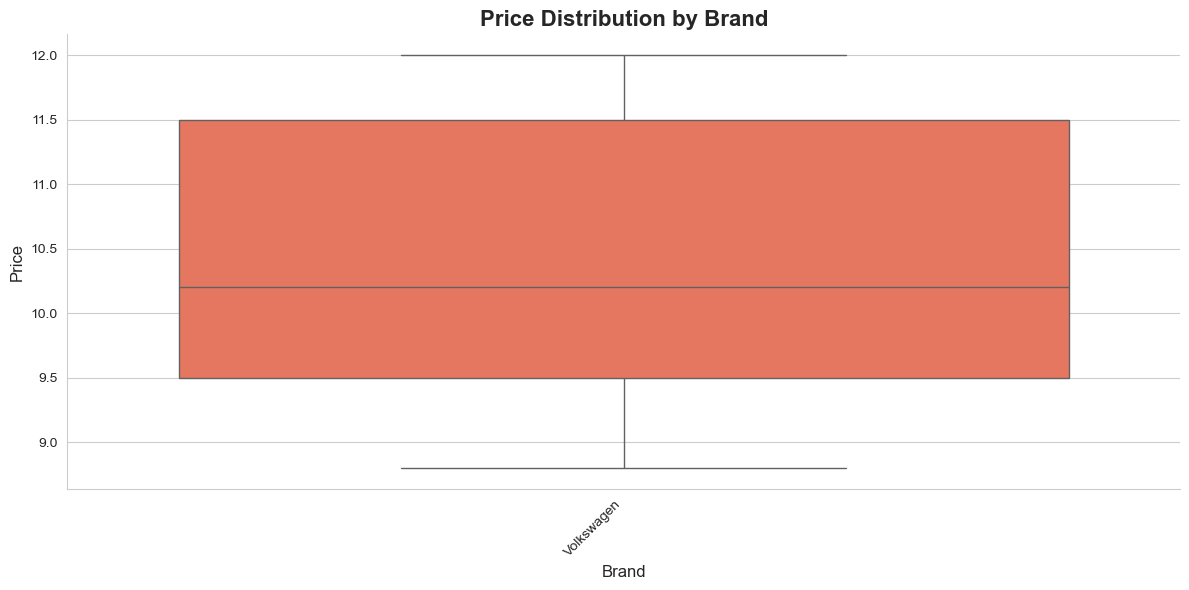

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=vw_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


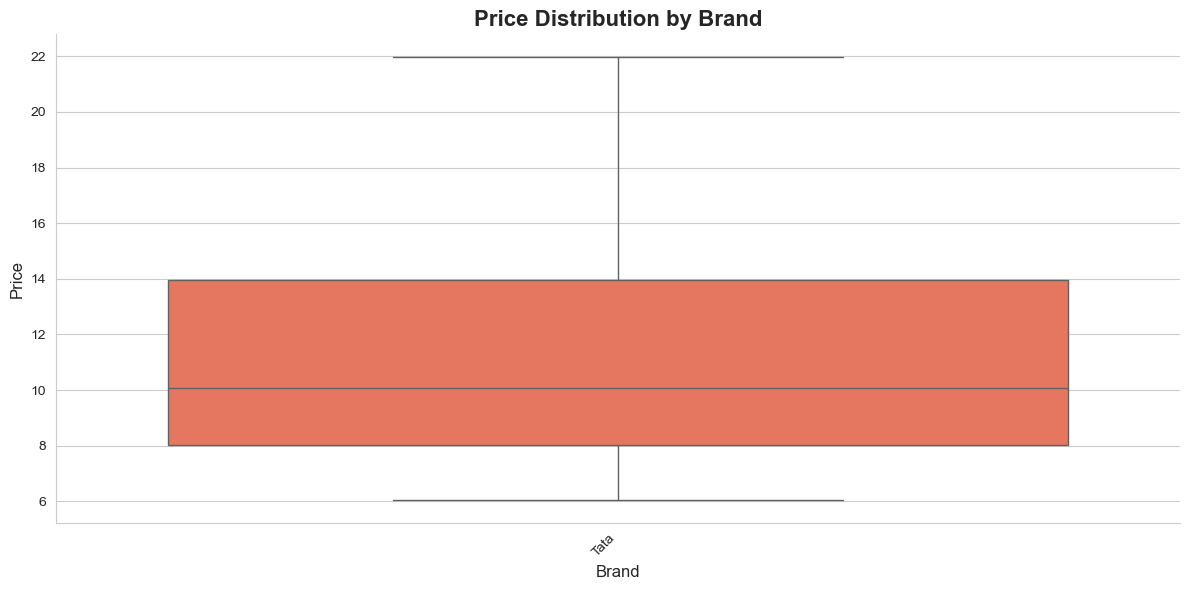

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # Clean background

sns.boxplot(
    x="Brand", 
    y="Price", 
    hue="Brand",        # add hue
    data=tata_data, 
    palette="Reds", 
    legend=False        # avoid duplicate legend
)


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.despine()  # Remove top & right spines
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Load datasets
datasets = {
    "Mahindra": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\mahindra_dataset.csv",
    "Honda": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\honda_dataset.csv",
    "Hyundai": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\hyundai_dataset.csv",
    "Kia": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\kia_dataset.csv",
    "Maruti_A": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\Maruti_A_dataset.csv",
    "Maruti_N": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\maruti_n_dataset.csv",
    "Skoda": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\skoda_dataset.csv",
    "Tata": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\tata_dataset.csv",
    "Volkswagen": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\vw_dataset.csv"
}

# ✅ Clean + Aggregate Function
def process_sales(file_path):
    df = pd.read_csv(file_path)
    df["SaleDate"] = pd.to_datetime(df["SaleDate"], dayfirst=True, errors="coerce")
    df = df.dropna(subset=["SaleDate"])
    sales = df.groupby("SaleDate")["SalesUnits"].sum().reset_index()
    sales["Rolling"] = sales["SalesUnits"].rolling(window=7, min_periods=1).mean()  # smooth trend
    return sales

# ✅ Apply processing for all brands
brand_sales = {brand: process_sales(path) for brand, path in datasets.items()}

# ✅ Plot all brands
plt.figure(figsize=(18,9))
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", n_colors=len(brand_sales))

for (brand, sales), color in zip(brand_sales.items(), palette):
    plt.plot(sales["SaleDate"], sales["Rolling"], linewidth=2.5, label=brand, color=color, alpha=0.9)

# ✅ Beautify
plt.title("Sales Trends Over Time (All Brands)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales Units (7-day Avg)", fontsize=14)
plt.legend(title="Brands", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=12, title_fontsize=13)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


### Exploratory Data Analysis

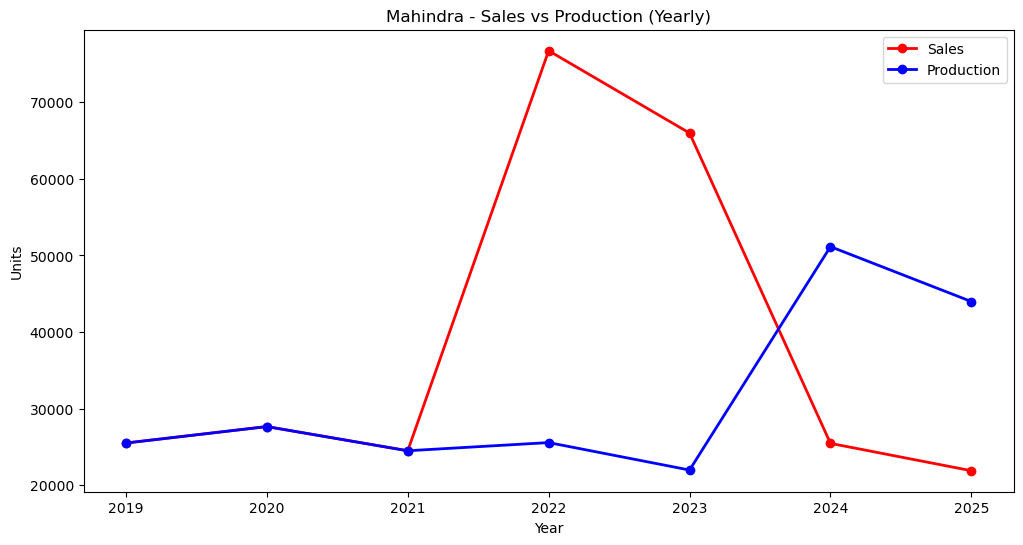

In [ ]:
yearly_data = mahindra_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'], 
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'], 
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Mahindra - Sales vs Production (Yearly)")
plt.legend()
plt.show()


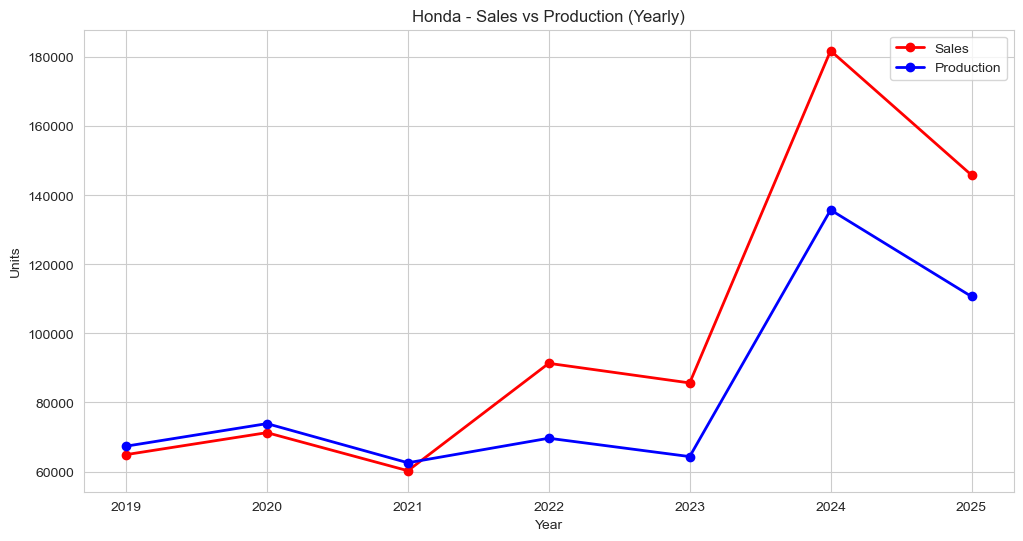

In [ ]:
yearly_data = honda_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Honda - Sales vs Production (Yearly)")
plt.legend()
plt.show()


In [ ]:
yearly_data = hyundai_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Hyundai - Sales vs Production (Yearly)")
plt.legend()
plt.show()


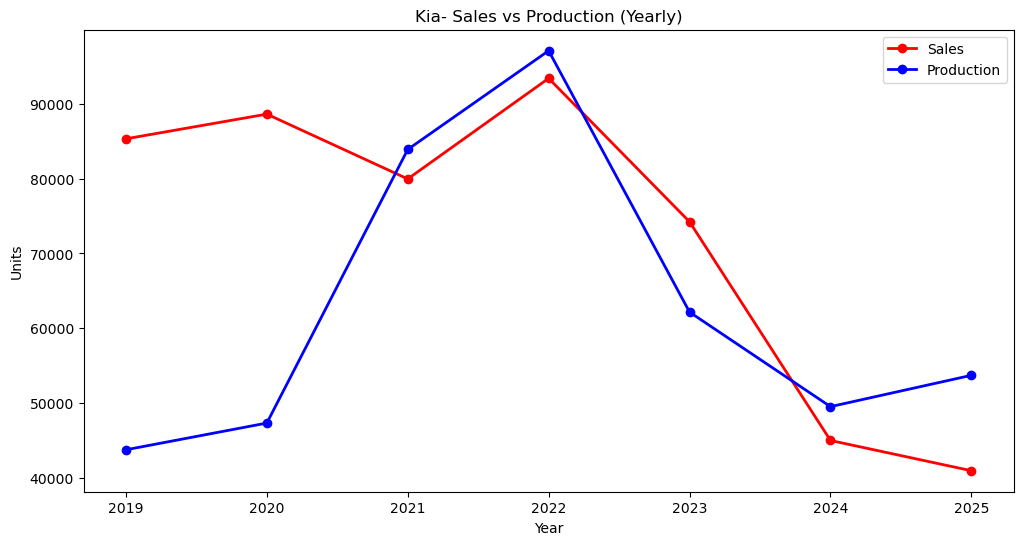

In [ ]:
yearly_data = kia_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Kia- Sales vs Production (Yearly)")
plt.legend()
plt.show()


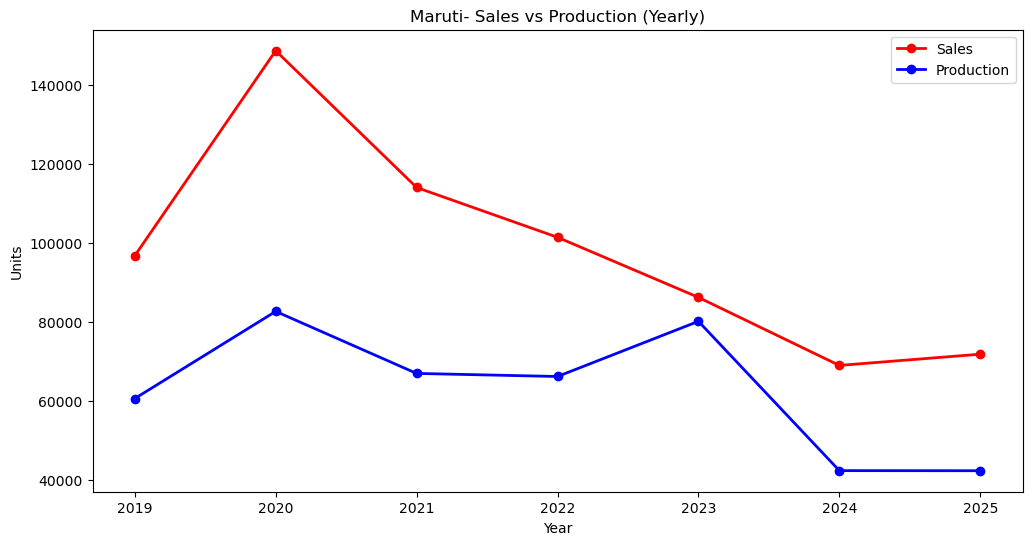

In [ ]:
yearly_data = maruti_n_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Maruti- Sales vs Production (Yearly)")
plt.legend()
plt.show()


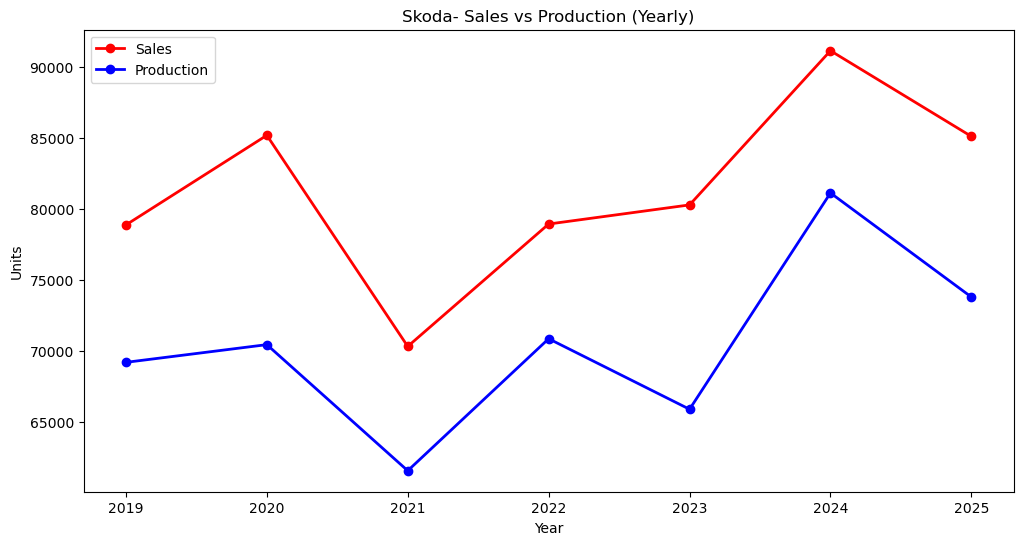

In [ ]:
yearly_data = skoda_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Skoda- Sales vs Production (Yearly)")
plt.legend()
plt.show()


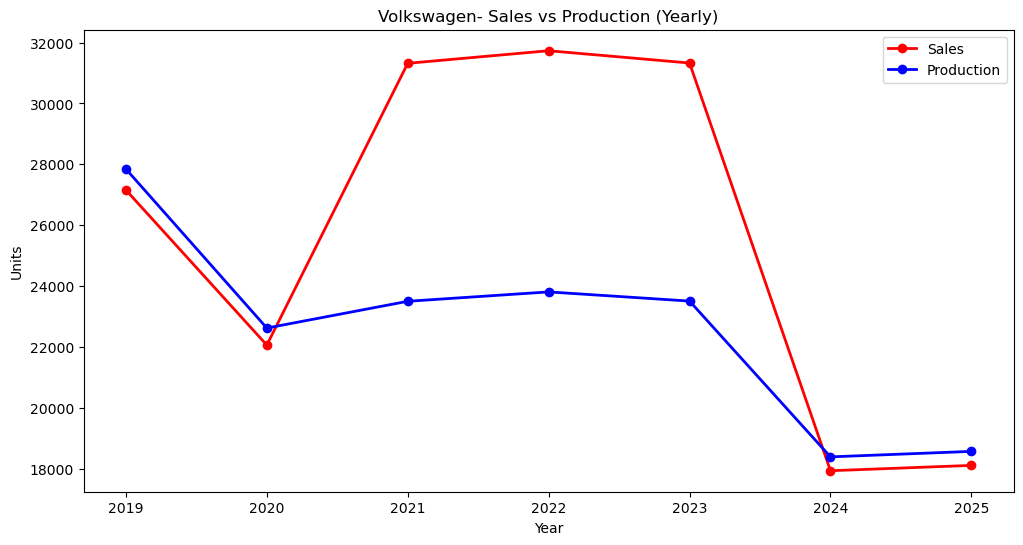

In [ ]:
yearly_data = vw_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Volkswagen- Sales vs Production (Yearly)")
plt.legend()
plt.show()


In [ ]:
yearly_data = tata_data.groupby('Year')[['SalesUnits', 'ProductionUnits']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(
    yearly_data['Year'], yearly_data['SalesUnits'],
    label='Sales', marker='o', color="red", linewidth=2
)
plt.plot(
    yearly_data['Year'], yearly_data['ProductionUnits'],
    label='Production', marker='o', color="blue", linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Tata- Sales vs Production (Yearly)")
plt.legend()
plt.show()


C:\Users\smcho\AppData\Local\Temp\ipykernel_764\142802397.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


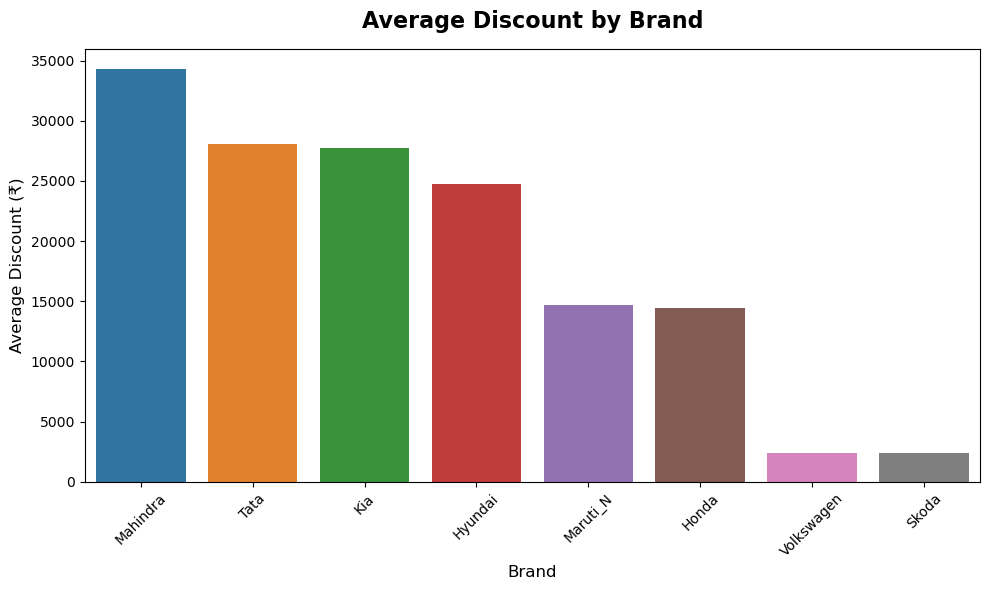

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# ✅ Load all datasets into a dictionary
datasets = {
    "Mahindra": mahindra_data,
    "Honda": honda_data,
    "Hyundai": hyundai_data,
    "Kia": kia_data,
    "Maruti_N": maruti_n_data,
    "Skoda": skoda_data,
    "Tata": tata_data,
    "Volkswagen": vw_data
}

# ✅ Add Brand column & merge all
all_data = pd.concat(
    [df.assign(Brand=brand) for brand, df in datasets.items()],
    ignore_index=True
)

# ✅ Average discount per brand
avg_discount = (
    all_data.groupby('Brand', observed=False)['Discount']
    .mean()
    .reset_index()
    .sort_values('Discount', ascending=False)  # sort for better visualization
)

# 🎨 Plot
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,6))
sns.barplot(
    x="Brand", 
    y="Discount", 
    data=avg_discount,
    palette="tab10"
)

plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Discount (₹)", fontsize=12)
plt.title("Average Discount by Brand", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


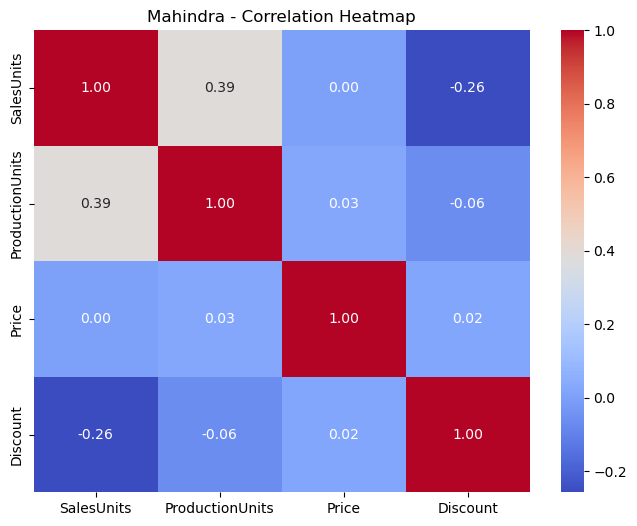

In [ ]:
# Mahindra
plt.figure(figsize=(8,6))
sns.heatmap(
    mahindra_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Mahindra - Correlation Heatmap")
plt.show()

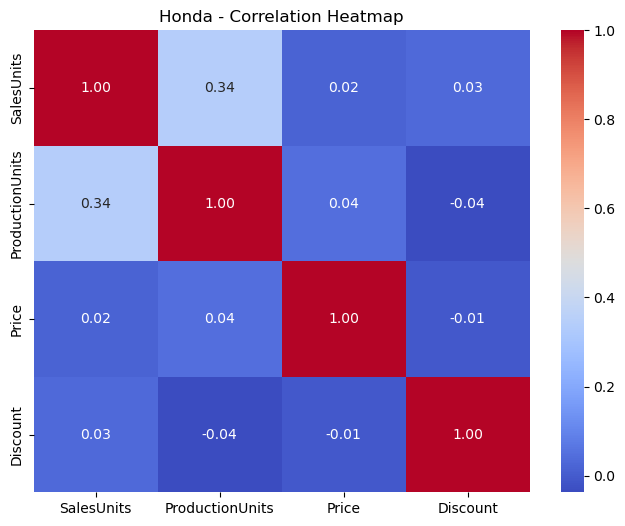

In [ ]:
# Honda
plt.figure(figsize=(8,6))
sns.heatmap(
    honda_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Honda - Correlation Heatmap")
plt.show()

In [ ]:
# Hyundai
plt.figure(figsize=(8,6))
sns.heatmap(
    hyundai_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Hyundai - Correlation Heatmap")
plt.show()

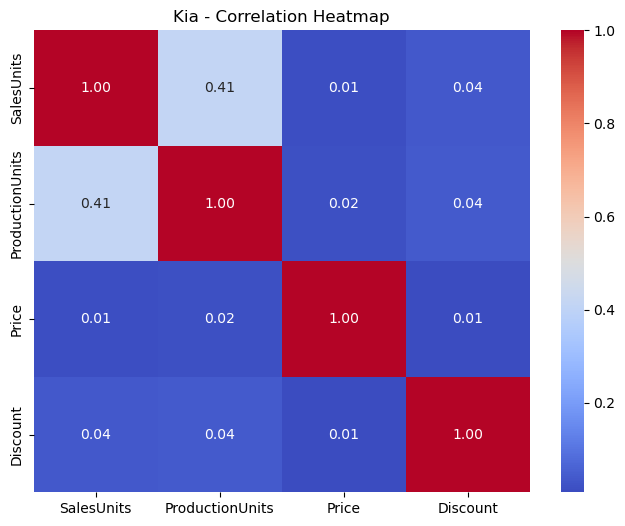

In [ ]:
# Kia
plt.figure(figsize=(8,6))
sns.heatmap(
    kia_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Kia - Correlation Heatmap")
plt.show()

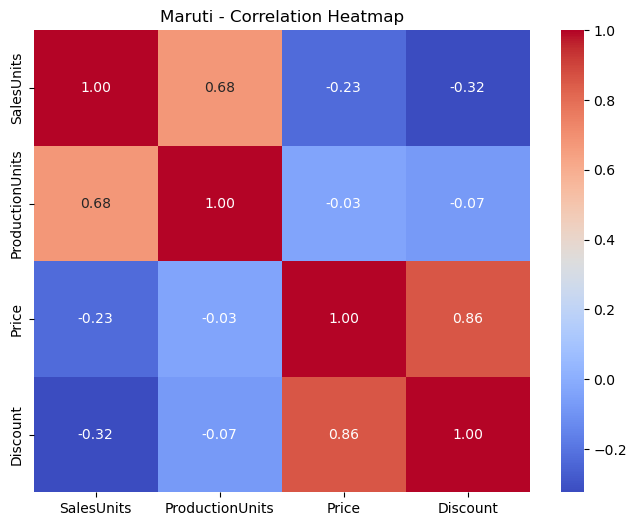

In [ ]:
# Maruti
plt.figure(figsize=(8,6))
sns.heatmap(
    maruti_n_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Maruti - Correlation Heatmap")
plt.show()


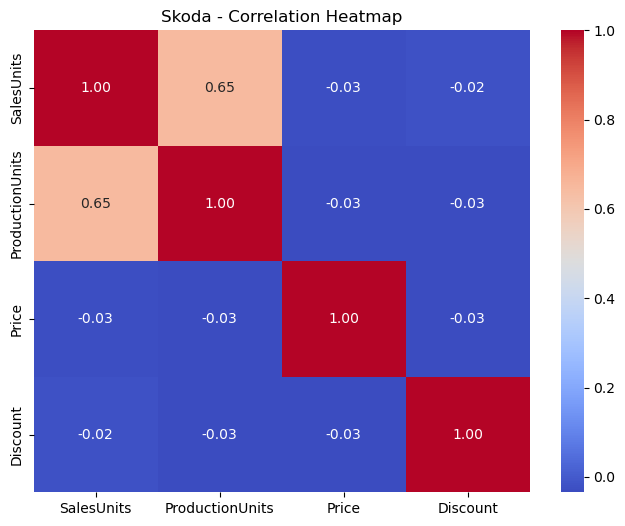

In [ ]:
# Skoda
plt.figure(figsize=(8,6))
sns.heatmap(
    skoda_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Skoda - Correlation Heatmap")
plt.show()

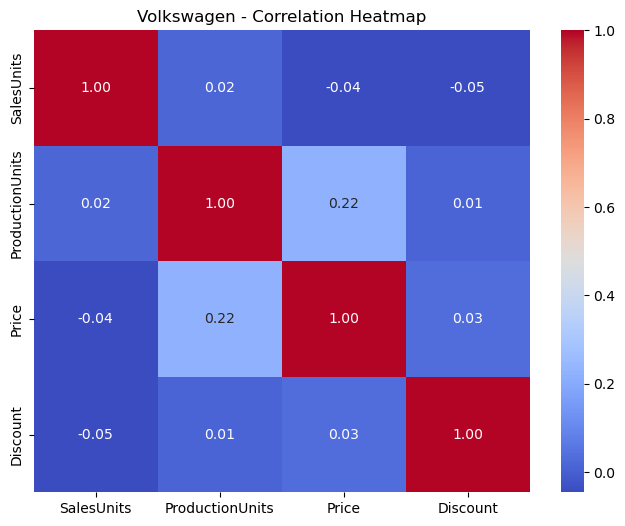

In [ ]:
# Volkswagen
plt.figure(figsize=(8,6))
sns.heatmap(
    vw_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Volkswagen - Correlation Heatmap")
plt.show()

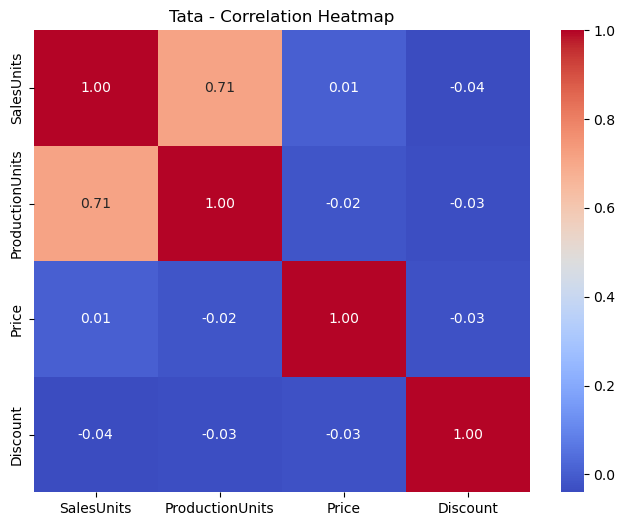

In [ ]:
# Tata
plt.figure(figsize=(8,6))
sns.heatmap(
    tata_data[['SalesUnits','ProductionUnits','Price','Discount']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Tata - Correlation Heatmap")
plt.show()

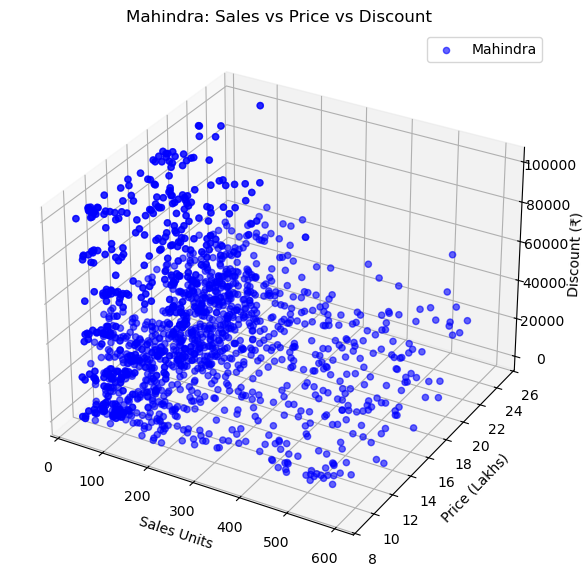

In [ ]:
# Mahindra
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    mahindra_data['SalesUnits'], 
    mahindra_data['Price'], 
    mahindra_data['Discount'],
    c='blue', label="Mahindra", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Mahindra: Sales vs Price vs Discount")
ax.legend()

plt.show()

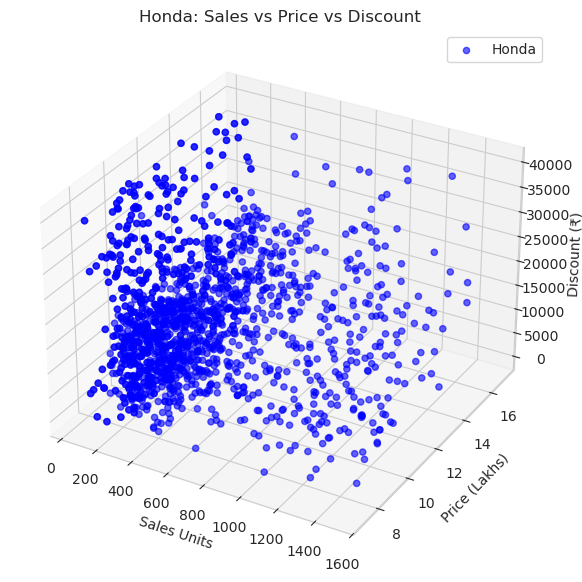

In [ ]:
# Honda
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(honda_data['SalesUnits'], honda_data['Price'], honda_data['Discount'],
           c='blue', label="Honda", alpha=0.6)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
plt.title("Honda: Sales vs Price vs Discount")
plt.legend()
plt.show()

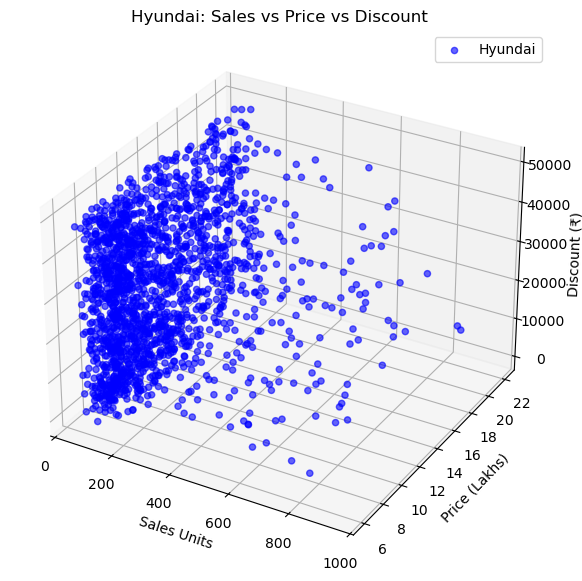

In [ ]:
# Hyundai
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    hyundai_data['SalesUnits'], 
    hyundai_data['Price'], 
    hyundai_data['Discount'],
    c='blue', label="Hyundai", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Hyundai: Sales vs Price vs Discount")
ax.legend()

plt.show()

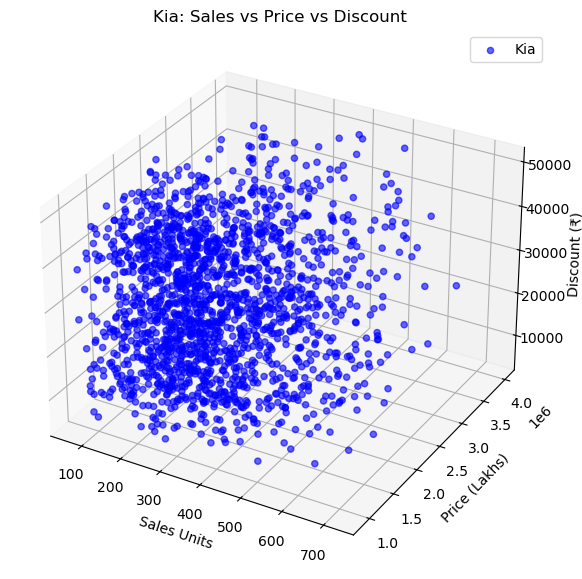

In [ ]:
# Kia
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    kia_data['SalesUnits'], 
    kia_data['Price'], 
    kia_data['Discount'],
    c='blue', label="Kia", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Kia: Sales vs Price vs Discount")
ax.legend()

plt.show()

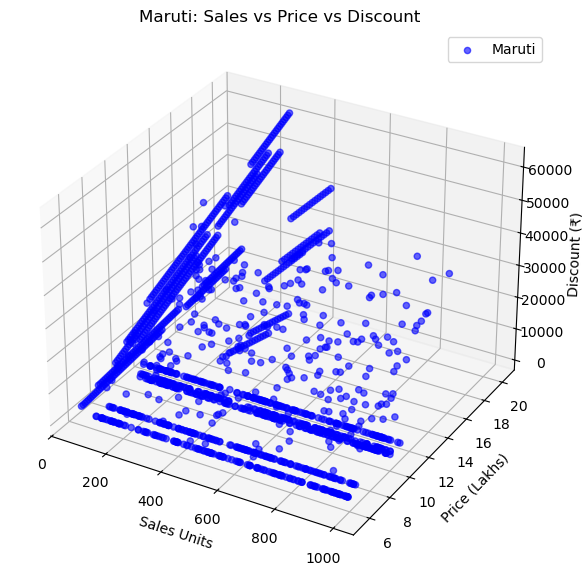

In [ ]:
# Maruti
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    maruti_n_data['SalesUnits'], 
    maruti_n_data['Price'], 
    maruti_n_data['Discount'],
    c='blue', label="Maruti", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Maruti: Sales vs Price vs Discount")
ax.legend()

plt.show()

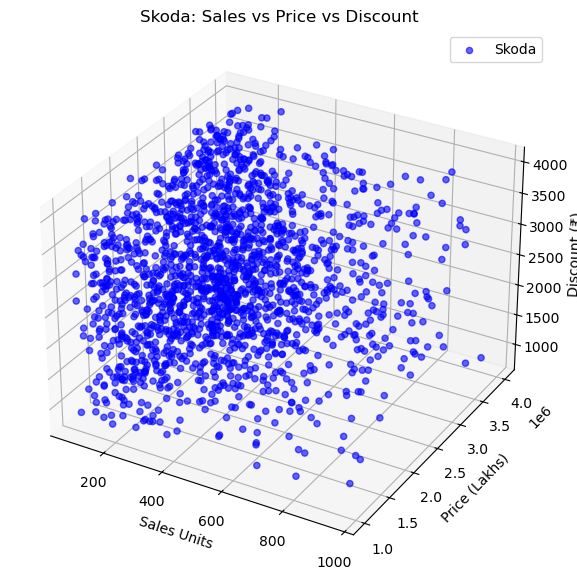

In [ ]:
# Skoda
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    skoda_data['SalesUnits'], 
    skoda_data['Price'], 
    skoda_data['Discount'],
    c='blue', label="Skoda", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Skoda: Sales vs Price vs Discount")
ax.legend()

plt.show()

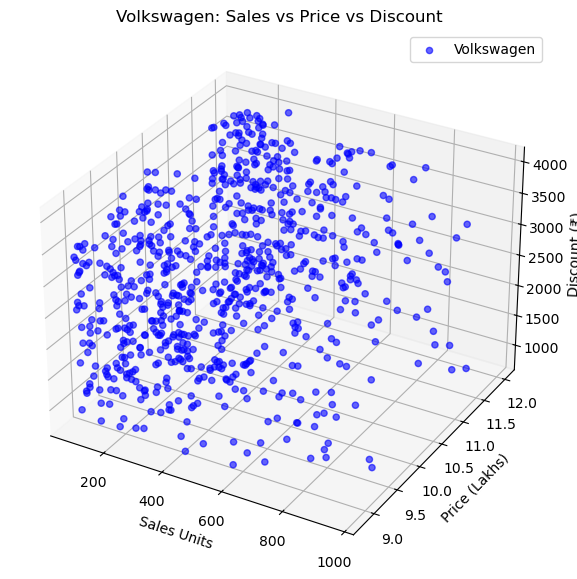

In [ ]:
# Volkswagen
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    vw_data['SalesUnits'], 
    vw_data['Price'], 
    vw_data['Discount'],
    c='blue', label="Volkswagen", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Volkswagen: Sales vs Price vs Discount")
ax.legend()

plt.show()

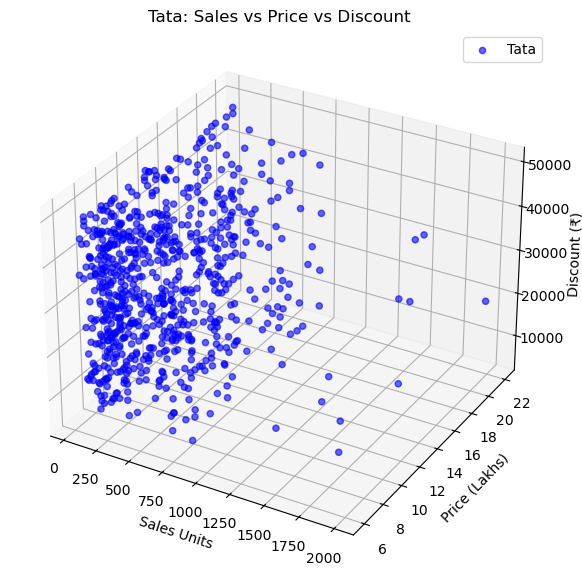

In [ ]:
# Tata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

# ✅ Fix font issue (₹ support)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Mahindra 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    tata_data['SalesUnits'], 
    tata_data['Price'], 
    tata_data['Discount'],
    c='blue', label="Tata", alpha=0.6
)

ax.set_xlabel("Sales Units")
ax.set_ylabel("Price (Lakhs)")
ax.set_zlabel("Discount (₹)")
ax.set_title("Tata: Sales vs Price vs Discount")
ax.legend()

plt.show()

### Training models

In [ ]:
from sklearn.impute import SimpleImputer

def train_models(df, date_col="SaleDate", target_col="SalesUnits"):
    # Drop rows where target (y) is NaN, since you can't train without labels
    df = df.dropna(subset=[target_col])

    X = df.drop(columns=[target_col, date_col])
    y = df[target_col]

    # Handle categorical variables
    X = pd.get_dummies(X, drop_first=True)

    # ✅ Fix: Handle missing values in features
    imputer = SimpleImputer(strategy="median")
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    models = {
        "LinearRegression": LinearRegression(),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
    }

    results = []
    tscv = TimeSeriesSplit(n_splits=5)

    for name, model in models.items():
        maes, rmses = [], []
        
        for train_idx, test_idx in tscv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # ✅ Double-check y has no NaNs
            if y_train.isna().any() or y_test.isna().any():
                continue  

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            maes.append(mean_absolute_error(y_test, y_pred))
            rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))

        if maes:  # only add if we actually computed
            mae, rmse = np.mean(maes), np.mean(rmses)
            results.append((name, model, mae, rmse))
            print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    best_model = sorted(results, key=lambda x: x[2])[0]
    return best_model, results


In [ ]:
# Training on Mahindra data
print("=== Mahindra Models ===")
mahindra_best, mahindra_results = train_models(mahindra_data)

# Training on Honda data
print("\n=== Honda Models ===")
honda_best, honda_results = train_models(honda_data)

# Training on Hyundai data
print("\n=== Hyundai Models ===")
hyundai_best, hyundai_results = train_models(hyundai_data)

# Training on Kia data
print("\n=== Kia Models ===")
kia_best, kia_results = train_models(kia_data)

# Training on Maruti data
print("\n=== Maruti Models ===")
maruti_best, maruti_results = train_models(maruti_n_data)

# Training on Skoda data
print("\n=== Skoda Models ===")
skoda_best, skoda_results = train_models(skoda_data)

# Training on Volkswagen data
print("\n=== Volkswagen Models ===")
vw_best, vw_results = train_models(vw_data)

# Training on Tata data
print("\n=== Tata Models ===")
tata_best, tata_results = train_models(tata_data)

# Printing the best  model
print("\nBest for Mahindra:", mahindra_best)
print("\nBest for Honda:", honda_best)
print("\nBest for Hyndai:", hyundai_best)
print("\nBest for Kia:", kia_best)
print("\nBest for Maruti:", maruti_best)
print("\nBest for Skoda:", skoda_best)
print("\nBest for Volkswagen:", vw_best)
print("\nBest for Tata:", tata_best)

=== Mahindra Models ===
LinearRegression → MAE: 103.54, RMSE: 116.70
RandomForest → MAE: 90.26, RMSE: 109.14
GradientBoosting → MAE: 93.22, RMSE: 106.93

=== Honda Models ===
LinearRegression → MAE: 279.85, RMSE: 322.84
RandomForest → MAE: 235.77, RMSE: 353.40
GradientBoosting → MAE: 266.08, RMSE: 325.69

=== Hyundai Models ===
LinearRegression → MAE: 85.31, RMSE: 141.56
RandomForest → MAE: 62.46, RMSE: 116.17
GradientBoosting → MAE: 76.98, RMSE: 122.73

=== Kia Models ===
LinearRegression → MAE: 58.35, RMSE: 74.45
RandomForest → MAE: 42.74, RMSE: 56.05
GradientBoosting → MAE: 41.83, RMSE: 53.54

=== Maruti Models ===
LinearRegression → MAE: 188.93, RMSE: 221.30
RandomForest → MAE: 149.68, RMSE: 188.46
GradientBoosting → MAE: 156.99, RMSE: 187.76

=== Skoda Models ===
LinearRegression → MAE: 64.29, RMSE: 83.53
RandomForest → MAE: 34.57, RMSE: 52.44
GradientBoosting → MAE: 42.32, RMSE: 58.70

=== Volkswagen Models ===
LinearRegression → MAE: 184.42, RMSE: 225.59
RandomForest → MAE: 175.

### Forecasting

In [ ]:
from sklearn.impute import SimpleImputer

def forecast_sales(df, best_model, horizon=12, date_col="SaleDate", target_col="SalesUnits"):
    # Copy & sort
    hist = df.copy()
    hist = hist.sort_values(date_col)

    # Prepare features
    features = hist.drop(columns=[target_col, date_col])
    features = pd.get_dummies(features, drop_first=True)

    # Align columns with training data
    model = best_model[1]  # the trained estimator
    train_features = model.feature_names_in_
    for col in train_features:
        if col not in features.columns:
            features[col] = 0
    features = features[train_features]

    # Impute missing values (same as training)
    imputer = SimpleImputer(strategy="median")
    X = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

    # Forecast loop
    last_date = pd.to_datetime(hist[date_col].iloc[-1])
    future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=horizon, freq="MS")

    preds = []
    last_row = X.iloc[[-1]].copy()

    for d in future_dates:
        y_hat = model.predict(last_row)[0]
        preds.append((d, y_hat))

        # Update row (if you had lag features, you’d insert y_hat here)
        new_row = last_row.copy()
        X = pd.concat([X, new_row], ignore_index=True)
        last_row = new_row

    forecast_df = pd.DataFrame(preds, columns=[date_col, "Forecast"])
    return forecast_df


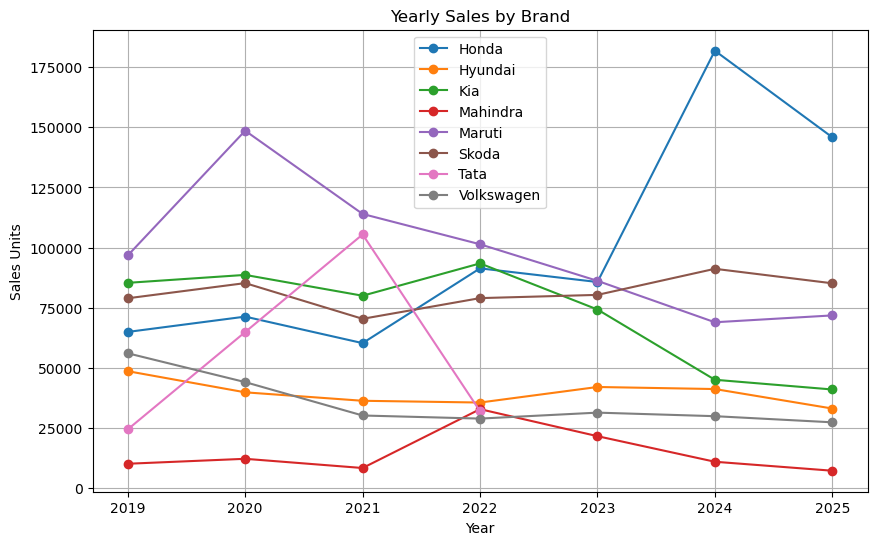

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for brand in yearly_sales["Brand"].unique():
    brand_data = yearly_sales[yearly_sales["Brand"] == brand]
    plt.plot(brand_data["Year"], brand_data["SalesUnits"], marker="o", label=brand)

plt.title("Yearly Sales by Brand")
plt.xlabel("Year")
plt.ylabel("Sales Units")
plt.legend()
plt.grid(True)
plt.show()


### Run for Mahindra & Honda

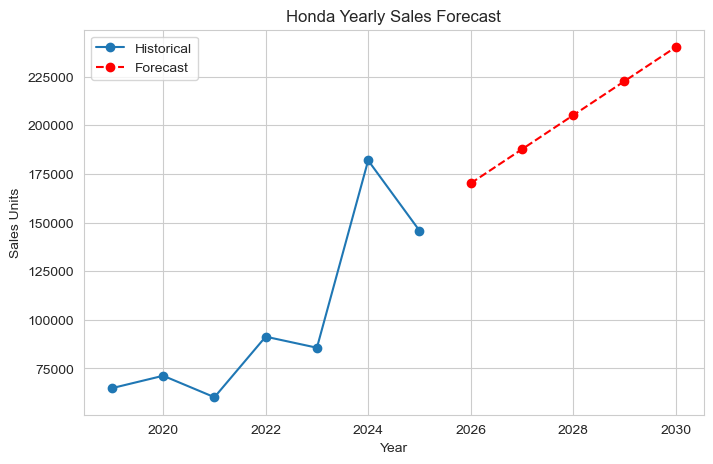

==== Honda Forecast ====
   Brand  Year       Forecast
0  Honda  2026  170113.714286
1  Honda  2027  187600.750000
2  Honda  2028  205087.785714
3  Honda  2029  222574.821429
4  Honda  2030  240061.857143




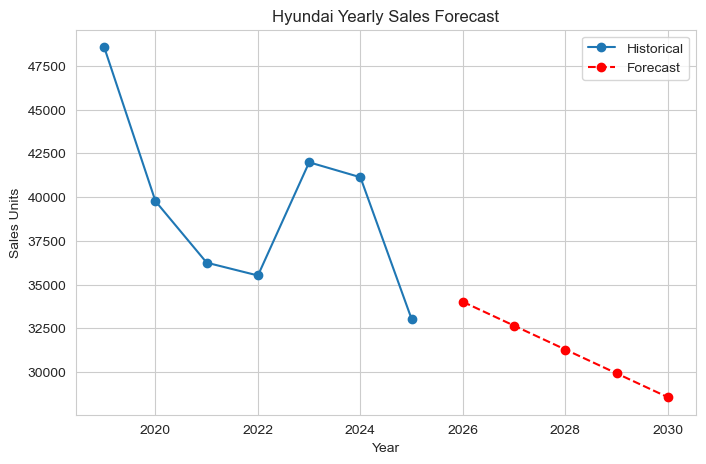

==== Hyundai Forecast ====
     Brand  Year      Forecast
0  Hyundai  2026  34010.028571
1  Hyundai  2027  32647.342857
2  Hyundai  2028  31284.657143
3  Hyundai  2029  29921.971429
4  Hyundai  2030  28559.285714




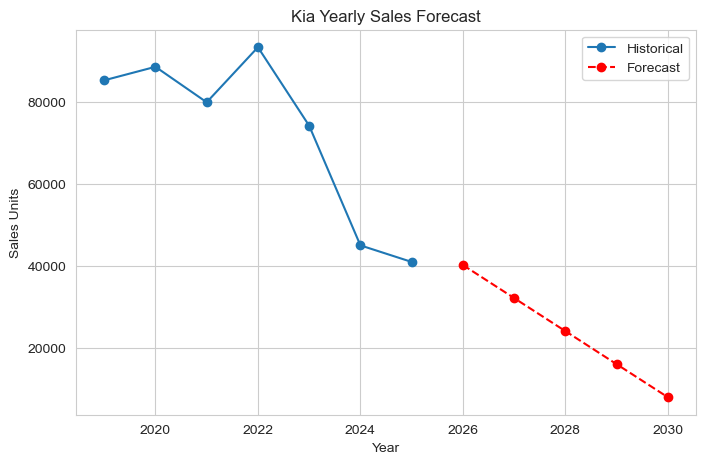

==== Kia Forecast ====
  Brand  Year      Forecast
0   Kia  2026  40192.328571
1   Kia  2027  32117.175000
2   Kia  2028  24042.021429
3   Kia  2029  15966.867857
4   Kia  2030   7891.714286




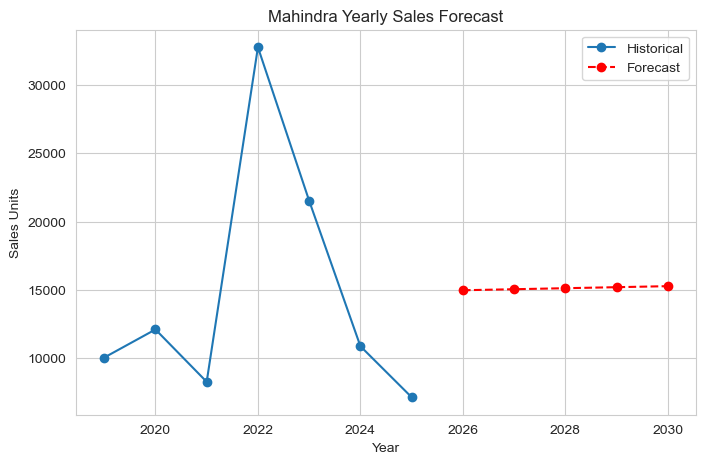

==== Mahindra Forecast ====
      Brand  Year      Forecast
0  Mahindra  2026  14974.714286
1  Mahindra  2027  15049.428571
2  Mahindra  2028  15124.142857
3  Mahindra  2029  15198.857143
4  Mahindra  2030  15273.571429




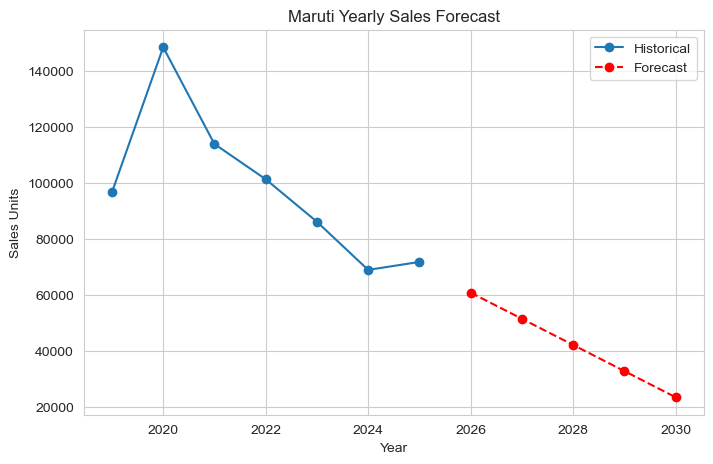

==== Maruti Forecast ====
    Brand  Year      Forecast
0  Maruti  2026  60777.571429
1  Maruti  2027  51418.642857
2  Maruti  2028  42059.714286
3  Maruti  2029  32700.785714
4  Maruti  2030  23341.857143




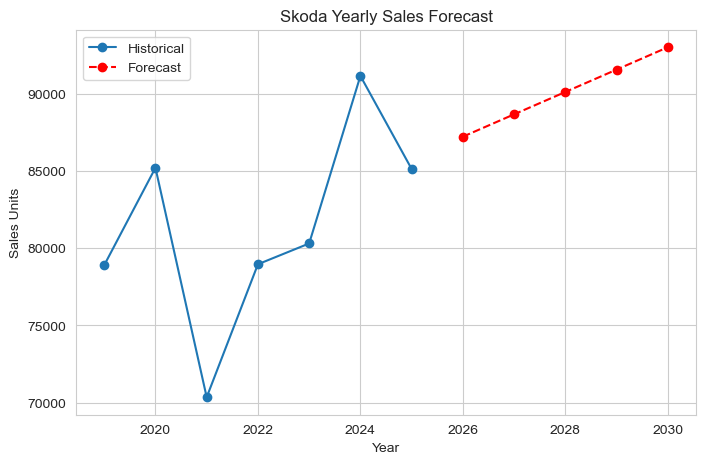

==== Skoda Forecast ====
   Brand  Year      Forecast
0  Skoda  2026  87223.314286
1  Skoda  2027  88671.821429
2  Skoda  2028  90120.328571
3  Skoda  2029  91568.835714
4  Skoda  2030  93017.342857




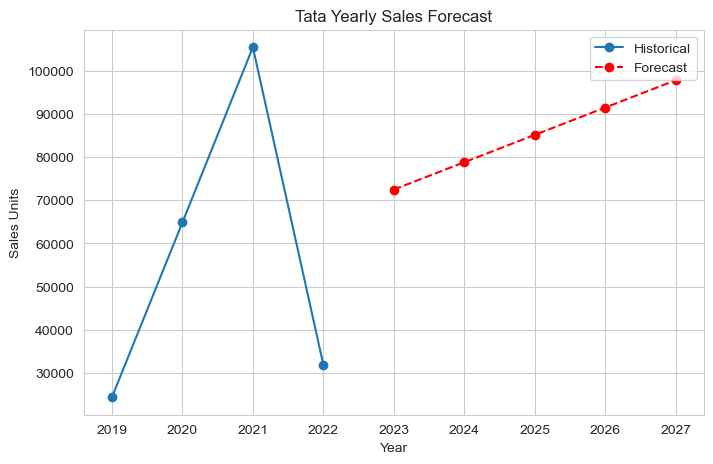

==== Tata Forecast ====
  Brand  Year      Forecast
0  Tata  2023  72464.766667
1  Tata  2024  78795.986666
2  Tata  2025  85127.206666
3  Tata  2026  91458.426666
4  Tata  2027  97789.646666




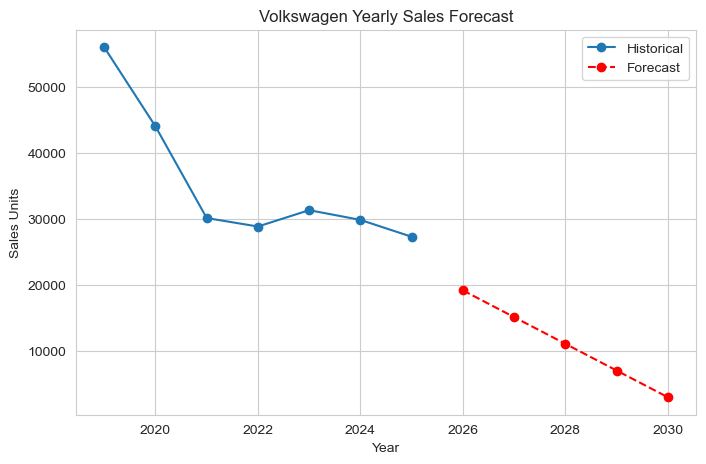

==== Volkswagen Forecast ====
        Brand  Year      Forecast
0  Volkswagen  2026  19156.371429
1  Volkswagen  2027  15108.928571
2  Volkswagen  2028  11061.485714
3  Volkswagen  2029   7014.042857
4  Volkswagen  2030   2966.600000




In [93]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def forecast_yearly(df, brand, periods=5):
    df = df.copy().reset_index(drop=True)
    df["t"] = np.arange(len(df))  # time index

    # Keep as DataFrame (so feature name is preserved)
    X = df[["t"]]
    y = df["SalesUnits"]
    model = LinearRegression()
    model.fit(X, y)

    # Future horizon (also DataFrame with same column name)
    future_t = pd.DataFrame({"t": np.arange(len(df), len(df)+periods)})
    future_years = np.arange(df["Year"].max()+1, df["Year"].max()+1+periods)
    preds = model.predict(future_t)

    forecast_df = pd.DataFrame({
        "Brand": brand,
        "Year": future_years,
        "Forecast": preds
    })

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df["Year"], df["SalesUnits"], marker="o", label="Historical")
    plt.plot(forecast_df["Year"], forecast_df["Forecast"], "r--o", label="Forecast")
    plt.title(f"{brand} Yearly Sales Forecast")
    plt.xlabel("Year")
    plt.ylabel("Sales Units")
    plt.legend()
    plt.show()

    return forecast_df


# 🔄 Show forecast for each brand separately
for brand in yearly_sales["Brand"].unique():
    df_brand = yearly_sales[yearly_sales["Brand"] == brand]
    forecast_df = forecast_yearly(df_brand, brand, periods=5)
    print(f"==== {brand} Forecast ====")
    print(forecast_df)
    print("\n" + "="*40 + "\n")


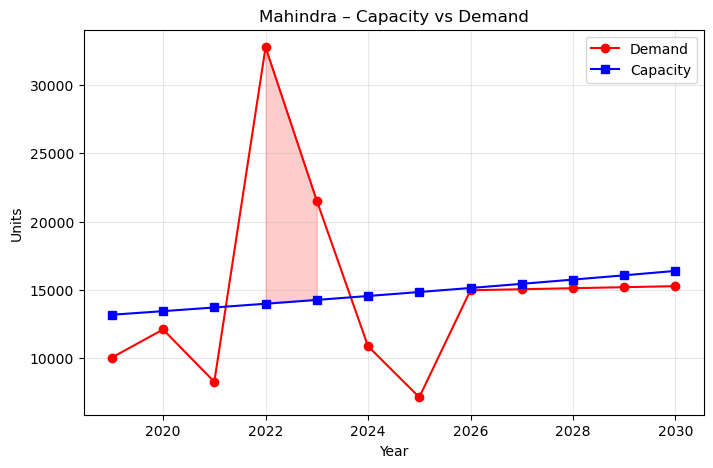


==== Mahindra Base Capacity Used: 13182 ====
    Year   Demand  Capacity      Gap
2   2021   8273.0     13714  -5441.0
3   2022  32760.0     13988  18772.0
4   2023  21522.0     14268   7254.0
5   2024  10878.0     14553  -3675.0
6   2025   7146.0     14845  -7699.0
7   2026  14975.0     15141   -166.0
8   2027  15049.0     15444   -395.0
9   2028  15124.0     15753   -629.0
10  2029  15199.0     16068   -869.0
11  2030  15274.0     16390  -1116.0


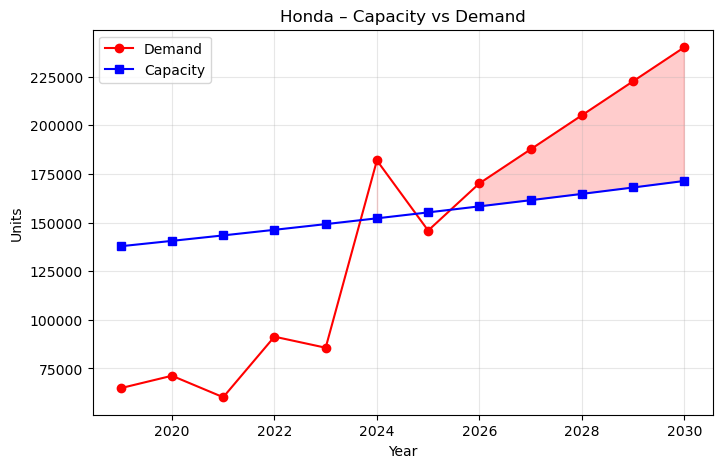


==== Honda Base Capacity Used: 137809 ====
    Year    Demand  Capacity      Gap
2   2021   60232.0    143376 -83144.0
3   2022   91344.0    146244 -54900.0
4   2023   85662.0    149168 -63506.0
5   2024  181894.0    152152  29742.0
6   2025  145873.0    155195  -9322.0
7   2026  170114.0    158299  11815.0
8   2027  187601.0    161465  26136.0
9   2028  205088.0    164694  40394.0
10  2029  222575.0    167988  54587.0
11  2030  240062.0    171348  68714.0


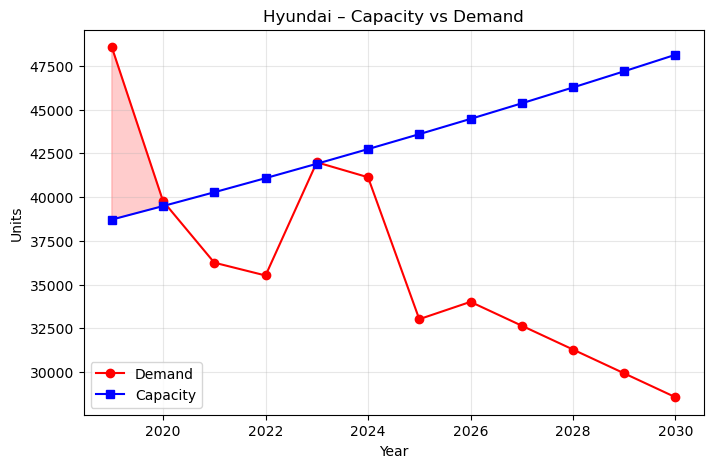


==== Hyundai Base Capacity Used: 38711 ====
    Year   Demand  Capacity      Gap
2   2021  36248.6     40274  -4025.4
3   2022  35516.0     41080  -5564.0
4   2023  41985.6     41902     83.6
5   2024  41130.6     42740  -1609.4
6   2025  33019.6     43594 -10574.4
7   2026  34010.0     44466 -10456.0
8   2027  32647.0     45356 -12709.0
9   2028  31285.0     46263 -14978.0
10  2029  29922.0     47188 -17266.0
11  2030  28559.0     48132 -19573.0


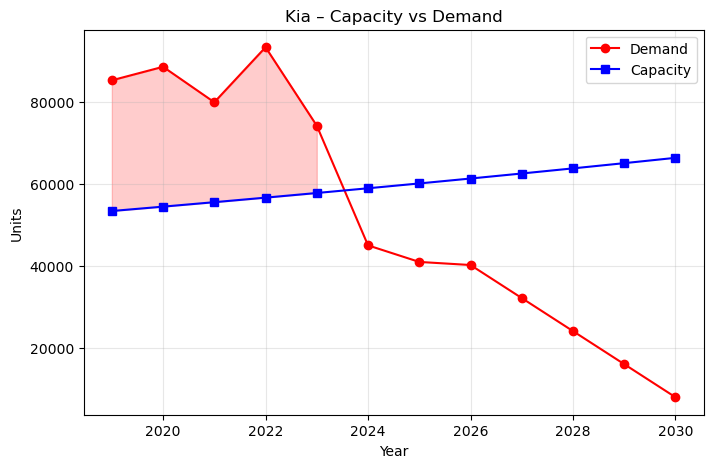


==== Kia Base Capacity Used: 53386 ====
    Year   Demand  Capacity      Gap
2   2021  79953.0     55542  24411.0
3   2022  93402.0     56653  36749.0
4   2023  74223.0     57786  16437.0
5   2024  44990.1     58942 -13951.9
6   2025  40945.5     60121 -19175.5
7   2026  40192.0     61323 -21131.0
8   2027  32117.0     62550 -30433.0
9   2028  24042.0     63801 -39759.0
10  2029  15967.0     65077 -49110.0
11  2030   7892.0     66378 -58486.0


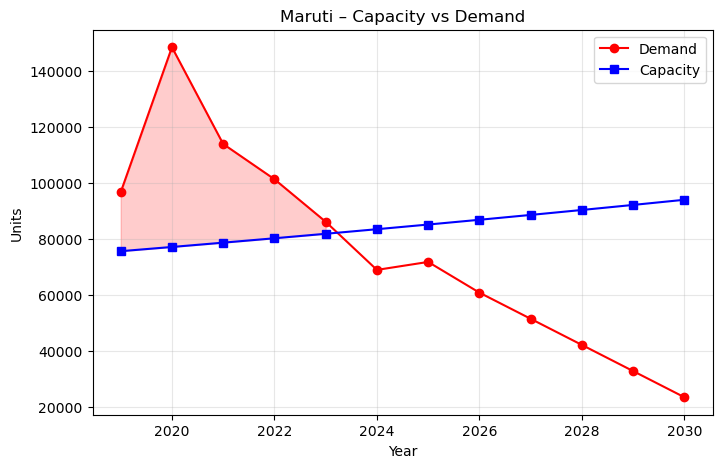


==== Maruti Base Capacity Used: 75609 ====
    Year    Demand  Capacity      Gap
2   2021  113978.8     78663  35315.8
3   2022  101366.0     80236  21130.0
4   2023   86149.6     81841   4308.6
5   2024   68914.6     83478 -14563.4
6   2025   71764.4     85148 -13383.6
7   2026   60778.0     86850 -26072.0
8   2027   51419.0     88587 -37168.0
9   2028   42060.0     90359 -48299.0
10  2029   32701.0     92166 -59465.0
11  2030   23342.0     94010 -70668.0


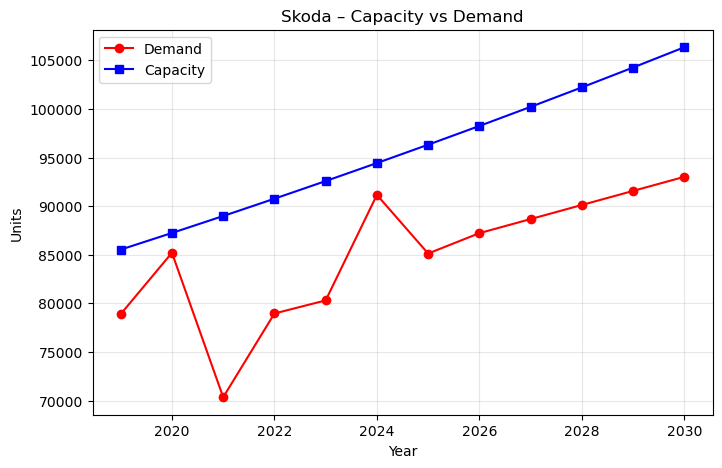


==== Skoda Base Capacity Used: 85531 ====
    Year   Demand  Capacity      Gap
2   2021  70347.4     88986 -18638.6
3   2022  78960.6     90766 -11805.4
4   2023  80306.8     92581 -12274.2
5   2024  91158.6     94433  -3274.4
6   2025  85128.4     96321 -11192.6
7   2026  87223.0     98248 -11025.0
8   2027  88672.0    100213 -11541.0
9   2028  90120.0    102217 -12097.0
10  2029  91569.0    104261 -12692.0
11  2030  93017.0    106347 -13330.0


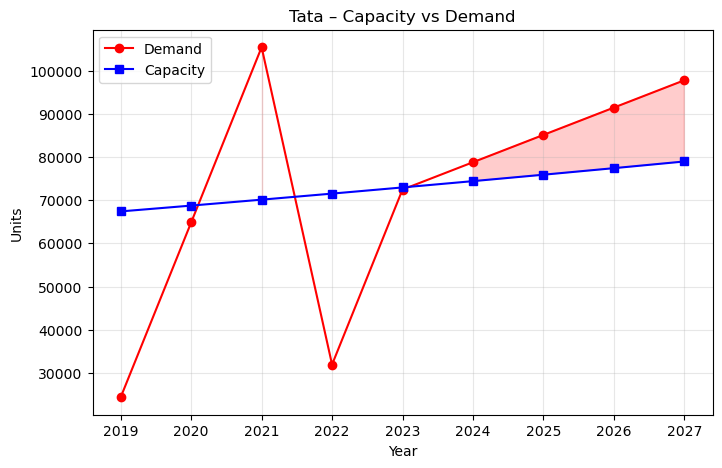


==== Tata Base Capacity Used: 67400 ====
   Year         Demand  Capacity           Gap
0  2019   24345.666667     67400 -43054.333333
1  2020   64841.600000     68748  -3906.400000
2  2021  105444.000000     70122  35322.000000
3  2022   31915.600000     71525 -39609.400000
4  2023   72465.000000     72955   -490.000000
5  2024   78796.000000     74415   4381.000000
6  2025   85127.000000     75903   9224.000000
7  2026   91458.000000     77421  14037.000000
8  2027   97790.000000     78969  18821.000000



==== Volkswagen Base Capacity Used: 29480 ====
    Year   Demand  Capacity      Gap
2   2021  30122.2     30670   -547.8
3   2022  28836.6     31284  -2447.4
4   2023  31316.0     31910   -594.0
5   2024  29839.0     32548  -2709.0
6   2025  27285.6     33199  -5913.4
7   2026  19156.0     33863 -14707.0
8   2027  15109.0     34540 -19431.0
9   2028  11061.0     35231 -24170.0
10  2029   7014.0     35935 -28921.0
11  2030   2967.0     36654 -33687.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Functions
# -----------------------------
def yearly_hist(df, date_col="SaleDate", target_col="SalesUnits"):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")
    df = df.dropna(subset=[date_col, target_col])
    y = df.groupby(df[date_col].dt.year)[target_col].sum().reset_index()
    y.columns = ["Year", "SalesUnits"]
    return y

def simple_yearly_forecast(hist_df, years_ahead=5):
    X = hist_df[["Year"]].values
    y = hist_df["SalesUnits"].values
    model = LinearRegression().fit(X, y)
    last_year = int(hist_df["Year"].max())
    future_years = np.arange(last_year + 1, last_year + 1 + years_ahead)
    y_hat = model.predict(future_years.reshape(-1, 1))
    return pd.DataFrame({"Year": future_years, "Forecast": y_hat.round(0).astype(int)})

def capacity_planning(hist_df, fc_df, brand, base_capacity=None, growth_rate=0.0):
    df = pd.concat(
        [
            hist_df.rename(columns={"SalesUnits": "Demand"}),
            fc_df.rename(columns={"Forecast": "Demand"}),
        ],
        ignore_index=True,
    )

    if base_capacity is None:
        base_capacity = int(hist_df.tail(3)["SalesUnits"].mean())

    df["Capacity"] = [int(base_capacity * ((1 + growth_rate) ** i)) for i in range(len(df))]
    df["Gap"] = df["Demand"] - df["Capacity"]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df["Year"], df["Demand"], marker="o", color="red", label="Demand")
    plt.plot(df["Year"], df["Capacity"], marker="s", color="blue", label="Capacity")

    over = df["Gap"] > 0
    plt.fill_between(df["Year"], df["Capacity"], df["Demand"], where=over, alpha=0.2, color="red")

    plt.title(f"{brand} – Capacity vs Demand")
    plt.xlabel("Year"); plt.ylabel("Units")
    plt.grid(True, alpha=0.3); plt.legend()
    plt.show()

    return df, base_capacity

# -----------------------------
# 2. Run for all brands
# -----------------------------
brands = all_data["Brand"].unique()  # <-- your master dataset
plans = {}

for brand in brands:
    df_brand = all_data[all_data["Brand"] == brand]

    hist = yearly_hist(df_brand)
    fc   = simple_yearly_forecast(hist, years_ahead=5)

    plan, base_cap = capacity_planning(hist, fc, brand, growth_rate=0.02)

    print(f"\n==== {brand} Base Capacity Used: {base_cap} ====")
    print(plan.tail(10))

    plans[brand] = plan


### Game Theory

In [ ]:
import pandas as pd
import numpy as np
import nashpy as nash

# === Step 1: Build yearly history for each brand ===
def yearly_hist(df, date_col="SaleDate", target_col="SalesUnits"):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")
    df = df.dropna(subset=[date_col, target_col])
    y = df.groupby(df[date_col].dt.year)[target_col].sum().reset_index()
    y.columns = ["Year", "SalesUnits"]
    return y

# === Step 2: Simple forecast using linear regression ===
from sklearn.linear_model import LinearRegression

def simple_yearly_forecast(hist_df, years_ahead=5):
    X = hist_df[["Year"]].values
    y = hist_df["SalesUnits"].values
    model = LinearRegression().fit(X, y)
    last_year = int(hist_df["Year"].max())
    future_years = np.arange(last_year + 1, last_year + 1 + years_ahead)
    y_hat = model.predict(future_years.reshape(-1, 1))
    return pd.DataFrame({"Year": future_years, "Forecast": y_hat.round(0).astype(int)})

# === Step 3: Get average gap per brand ===
brand_gaps = {}
brand_forecasts = {}

brands = all_data["Brand"].unique()

for brand in brands:
    df_brand = all_data[all_data["Brand"] == brand]
    hist = yearly_hist(df_brand)
    fc   = simple_yearly_forecast(hist, years_ahead=5)
    
    # Assume capacity = average of last 3 historical years
    base_capacity = int(hist.tail(3)["SalesUnits"].mean())
    gap = np.mean(fc["Forecast"] - base_capacity)
    
    brand_gaps[brand] = gap
    brand_forecasts[brand] = {"Forecast": fc, "Capacity": base_capacity}

print("🔹 Average Gaps per Brand:", brand_gaps)


# === Step 4: Payoff matrix generator ===
def payoff_matrix(gap_self, gap_other):
    """
    Build payoff matrices (2x2):
    Strategy 0 = Don't expand
    Strategy 1 = Expand
    """
    payoff_self = np.array([
        [-5, -10],   # self: no expand
        [10, 2]      # self: expand
    ])
    payoff_other = np.array([
        [-5, 10],    # other: no expand
        [-10, 2]     # other: expand
    ])
    return payoff_self, payoff_other


# === Step 5: Nash equilibria for all brand pairs ===
for i in range(len(brands)):
    for j in range(i+1, len(brands)):
        b1, b2 = brands[i], brands[j]
        
        A, B = payoff_matrix(brand_gaps[b1], brand_gaps[b2])
        game = nash.Game(A, B)
        eqs = list(game.support_enumeration())
        
        print(f"\n⚔️ {b1} vs {b2}")
        print("Payoff Matrix A (for", b1, "):\n", A)
        print("Payoff Matrix B (for", b2, "):\n", B)
        print("🎯 Nash Equilibria:", eqs)


🔹 Average Gaps per Brand: {'Mahindra': np.float64(1942.2), 'Honda': np.float64(67279.0), 'Hyundai': np.float64(-7426.4), 'Kia': np.float64(-29344.0), 'Maruti': np.float64(-33549.0), 'Skoda': np.float64(4589.2), 'Tata': np.float64(17727.2), 'Volkswagen': np.float64(-18418.6)}

⚔️ Mahindra vs Honda
Payoff Matrix A (for Mahindra ):
 [[ -5 -10]
 [ 10   2]]
Payoff Matrix B (for Honda ):
 [[ -5  10]
 [-10   2]]
🎯 Nash Equilibria: [(array([0., 1.]), array([0., 1.]))]

⚔️ Mahindra vs Hyundai
Payoff Matrix A (for Mahindra ):
 [[ -5 -10]
 [ 10   2]]
Payoff Matrix B (for Hyundai ):
 [[ -5  10]
 [-10   2]]
🎯 Nash Equilibria: [(array([0., 1.]), array([0., 1.]))]

⚔️ Mahindra vs Kia
Payoff Matrix A (for Mahindra ):
 [[ -5 -10]
 [ 10   2]]
Payoff Matrix B (for Kia ):
 [[ -5  10]
 [-10   2]]
🎯 Nash Equilibria: [(array([0., 1.]), array([0., 1.]))]

⚔️ Mahindra vs Maruti
Payoff Matrix A (for Mahindra ):
 [[ -5 -10]
 [ 10   2]]
Payoff Matrix B (for Maruti ):
 [[ -5  10]
 [-10   2]]
🎯 Nash Equilibria: [(a

![Nash Equilibrium](nash_equi.png)

## Nash Equilibria in Capacity Expansion Game – Mahindra vs Honda

#### This is a 2×2 payoff matrix where both companies (Mahindra and Honda) decide whether to expand production capacity after COVID demand surge.

#### Players & Strategies

### Players: Mahindra & Honda

#### Strategies:

#### Don’t Expand (keep production stable)

#### Expand (increase production capacity)

#### Payoffs in the Matrix

#### Each cell shows outcomes as (M, H) → (Mahindra’s payoff, Honda’s payoff).

#### Top-left (Don’t Expand, Don’t Expand):

#### Payoff: M = 0, H = 0

#### Neither expands. Both remain stable. No gain, no loss.

#### Top-right (Don’t Expand, Expand):

#### Payoff: M = 0, H = 0

#### Honda expands, Mahindra does not → still both end up neutral (likely market saturation prevents extra gain).

#### Bottom-left (Expand, Don’t Expand):

#### Payoff: M = -5, H = +10

#### Mahindra expands, Honda doesn’t → Honda benefits (takes demand), Mahindra loses (overproduction).

#### Bottom-right (Expand, Expand):

#### Payoff: M = -5, H = +10

#### Both expand → Honda still benefits more, Mahindra takes a loss.

### Interpretation

#### This is a competitive duopoly game.

#### Honda appears to have a structural advantage: no matter what, Mahindra suffers if it expands.

#### Honda consistently gets +10 payoff when Mahindra expands (whether Honda itself expands or not).

---

## Nash Equilibrium:

### If Mahindra plays rationally, it should not expand (to avoid losses).

### Honda, knowing this, has no incentive to expand either (since it gains nothing extra when Mahindra doesn’t expand).

#### So, the likely equilibrium is (Don’t Expand, Don’t Expand) with payoffs (0, 0).

--- 
## Conclusion:

### This game theory model shows that aggressive capacity expansion post-COVID is risky for Mahindra, while Honda can exploit Mahindra’s expansion. The stable outcome (Nash equilibrium) is that both firms avoid expansion to prevent losses, even if it means no additional profit.

In [94]:
import pandas as pd
import numpy as np
import pickle as pk
from sklearn.linear_model import LinearRegression
import os

# Save models in the same folder as app.py
save_dir = r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks"

brand_files = {
    "Mahindra": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\mahindra_dataset.csv",
    "Honda": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\honda_dataset.csv",
    "Hyundai": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\hyundai_dataset.csv",
    "Kia": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\kia_dataset.csv",
    "Maruti": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\maruti_n_dataset.csv",
    "Skoda": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\skoda_dataset.csv",
    "Tata": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\tata_dataset.csv",
    "Volkswagen": r"C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\data\vw_dataset.csv",
}

for brand, path in brand_files.items():
    df = pd.read_csv(path)
    df["SaleDate"] = pd.to_datetime(df["SaleDate"], dayfirst=True, errors="coerce")
    
    yearly = df.groupby(df["SaleDate"].dt.year)["SalesUnits"].sum().reset_index()
    X = np.arange(len(yearly)).reshape(-1, 1)
    y = yearly["SalesUnits"].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    model_path = os.path.join(save_dir, f"{brand}_forecast.pkl")
    pk.dump(model, open(model_path, "wb"))
    print(f"✅ Saved {model_path}")


✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Mahindra_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Honda_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Hyundai_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Kia_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Maruti_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Skoda_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Industry-\notebooks\Tata_forecast.pkl
✅ Saved C:\Users\smcho\OneDrive\Desktop\Project 101\Real-Life-Project-Based-on-Automobile-Indu